In [1]:
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import matplotlib.pyplot as plt
import datetime as dt # date time
import seaborn as snsA
import seaborn as sns
import warnings#
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_theme()
!pip install vaderSentiment
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import *
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download VADER lexicon 
nltk.download('vader_lexicon')
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import numpy as np

from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas.plotting import register_matplotlib_converters
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import numpy as np





[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


2024-05-14 16:29:38.990405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
##file_path = "debasmitamohanty/UpGradDataScienceMastersProgram/researchLJMU/archive-2/stock_yfinance_data.csv"
stock_yfinance_data=pd.read_csv('stock_yfinance_data.csv')

In [3]:
stock_tweets=pd.read_csv('stock_tweets.csv')

In [4]:
stock_yfinance_data.head()

Date        Open        High         Low       Close   Adj Close  \
0  9/30/2021  260.333344  263.043335  258.333344  258.493347  258.493347   
1  10/1/2021  259.466675  260.260010  254.529999  258.406677  258.406677   
2  10/4/2021  265.500000  268.989990  258.706665  260.510010  260.510010   
3  10/5/2021  261.600006  265.769989  258.066681  260.196655  260.196655   
4  10/6/2021  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume Stock Name  
0  53868000       TSLA  
1  51094200       TSLA  
2  91449900       TSLA  
3  55297800       TSLA  
4  43898400       TSLA

In [5]:
stock_tweets.head()

Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.

In [377]:
## Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# Filter stock data for AAPL, NFLX, and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Filter tweet data for AAPL, NFLX, and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Convert 'Date' columns to datetime format
filtered_stock_yfinance_data['Date'] = pd.to_datetime(filtered_stock_yfinance_data['Date'])
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.date

# Convert the 'Date' column in filtered_stock_tweets to datetime
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])


In [376]:
# Check filtered stock data
print("Filtered Stock Data:")
print(filtered_stock_yfinance_data.head())

# Check filtered tweet data
print("\nFiltered Tweet Data:")
print(filtered_stock_tweets.head())

# Merge the datasets on the 'Date' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])

# Ensure data is sorted by date
merged_data = merged_data.sort_values('Date')

# Check merged data
print("\nMerged Data:")
print(merged_data.head())

# Remove duplicate entries
merged_data.drop_duplicates(subset=['Date', 'Stock Name'], inplace=True)

# Ensure data is sorted by date
merged_data = merged_data.sort_values('Date')

# Set the 'Date' column as index
merged_data.set_index('Date', inplace=True)

# Ensure the date index has frequency information
merged_data = merged_data.asfreq('D')

# Forward fill to handle NaN values
merged_data = merged_data.ffill()

# We will use the 'Close' price for the ARIMA model
stock_name = 'AMZN'  # Change this to 'AAPL' or 'NFLX' for other stocks
stock_data = merged_data[merged_data['Stock Name'] == stock_name]['Close']

# Split the data into train and test sets
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]
# Check stock data
print(f"\n{stock_name} Stock Data:")
print(stock_data.head())



Filtered Stock Data:
           Date        Open        High         Low       Close   Adj Close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   

        Volume Stock Name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  

Filtered Tweet Data:
            Date                                              Tweet  \
48351 2022-09-29  A group of lawmakers led by Sen. Elizabeth War...   
48352 2022-09-29  $NIO just because I'm down money doesn't mean ...   
48353 2022-09-29  Today’s drop in $SPX is a perfect example of w...   
48354 2022-09-29  Druckenmille

ValueError: cannot reindex on an axis with duplicate labels

# Merge Data and applying LSTM

In [6]:


# Filter stock data for AAPL,NFLX and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]


# Filter tweet data for AAPL,NFLX and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Display the filtered stock data
print(filtered_stock_yfinance_data.head())

# Display the filtered tweet data
print(filtered_stock_tweets.head())


           Date        Open        High         Low       Close   Adj Close  \
1008  9/30/2021  165.800003  166.392502  163.699493  164.251999  164.251999   
1009  10/1/2021  164.450501  165.458496  162.796997  164.162994  164.162994   
1010  10/4/2021  163.969498  163.999496  158.812500  159.488998  159.488998   
1011  10/5/2021  160.225006  163.036499  160.123001  161.050003  161.050003   
1012  10/6/2021  160.676498  163.216995  159.931000  163.100494  163.100494   

        Volume Stock Name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  
                            Date  \
48351  2022-09-29 22:40:47+00:00   
48352  2022-09-29 22:23:54+00:00   
48353  2022-09-29 18:34:51+00:00   
48354  2022-09-29 15:57:59+00:00   
48355  2022-09-29 15:10:30+00:00   

                                                   Tweet Stock Name  \
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN  

In [343]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# Filter stock data for AAPL, NFLX, and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Filter tweet data for AAPL, NFLX, and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Convert 'Date' columns to datetime format
filtered_stock_yfinance_data['Date'] = pd.to_datetime(filtered_stock_yfinance_data['Date'])
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.date

# Convert the 'Date' column in filtered_stock_tweets to datetime
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])

# Merge the datasets on the 'Date' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])


In [347]:
# Extract non-numeric columns
non_numeric_columns = ['Stock Name', 'Tweet', 'Company Name']

# Keep non-numeric data separately
non_numeric_data = merged_data[non_numeric_columns]

# Drop non-numeric columns for scaling
numeric_data = merged_data.drop(columns=non_numeric_columns)

# Split the data into train and test sets
train_size = int(len(numeric_data) * 0.8)
train, test = numeric_data.iloc[:train_size], numeric_data.iloc[train_size:]

# Scale the numeric data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Define a function to prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), :-1])
        Y.append(dataset[i + look_back, -1])
    return np.array(X), np.array(Y)

# Prepare the data for LSTM
look_back = 3
X_train, Y_train = create_dataset(train_scaled, look_back)
X_test, Y_test = create_dataset(test_scaled, look_back)

# Reshape input data to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


Epoch 1/100
112/112 [==============================] - 8s 11ms/step - loss: 0.0293 - val_loss: 2.2217
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 3.2019e-04 - val_loss: 2.2125
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 2.3630e-04 - val_loss: 2.1884
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 2.0101e-04 - val_loss: 2.1489
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 1.6299e-04 - val_loss: 2.1045
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 1.2255e-04 - val_loss: 2.0896
Epoch 7/100
112/112 [==============================] - 0s 4ms/step - loss: 8.7750e-05 - val_loss: 2.0933
Epoch 8/100
112/112 [==============================] - 0s 4ms/step - loss: 7.2743e-05 - val_loss: 2.1215
Epoch 9/100
112/112 [==============================] - 0s 4ms/step - loss: 6.6333e-05 - val_loss: 2.0960
Epoch 10/100
112/112 [==============================] - 0s

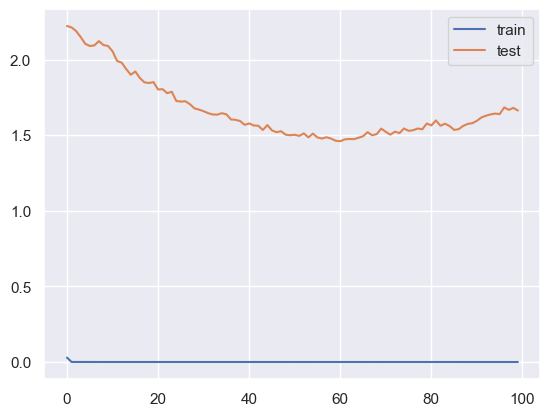

56/56 [==============================] - 0s 2ms/step


In [348]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), verbose=1)

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [349]:
# Reshape predictions to match the expected shape for the inverse transformation
train_predictions = train_predictions.reshape(-1, 1)
test_predictions = test_predictions.reshape(-1, 1)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(np.concatenate([train_scaled[:len(train_predictions), :-1], train_predictions], axis=1))[:,-1]
Y_train = scaler.inverse_transform(np.concatenate([train_scaled[:len(Y_train), :-1], Y_train.reshape(-1, 1)], axis=1))[:,-1]
test_predictions = scaler.inverse_transform(np.concatenate([test_scaled[:len(test_predictions), :-1], test_predictions], axis=1))[:,-1]
Y_test = scaler.inverse_transform(np.concatenate([test_scaled[:len(Y_test), :-1], Y_test.reshape(-1, 1)], axis=1))[:,-1]

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train, train_predictions))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(Y_test, test_predictions))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 0.28 RMSE
Test Score: 106.37 RMSE


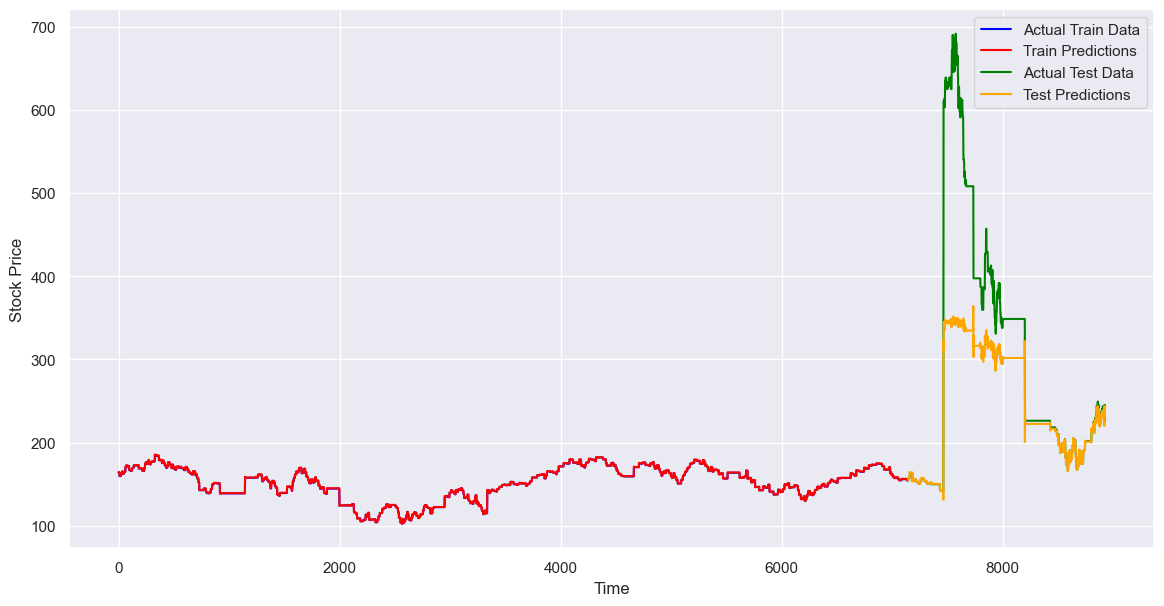

In [350]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(Y_train)), Y_train, color='blue', label='Actual Train Data')
plt.plot(np.arange(len(train_predictions)), train_predictions, color='red', label='Train Predictions')
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test, color='green', label='Actual Test Data')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, color='orange', label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [353]:
# Convert train and test dates to datetime objects
train_dates = pd.to_datetime(train.index[look_back:])
test_dates = pd.to_datetime(test.index[look_back:])


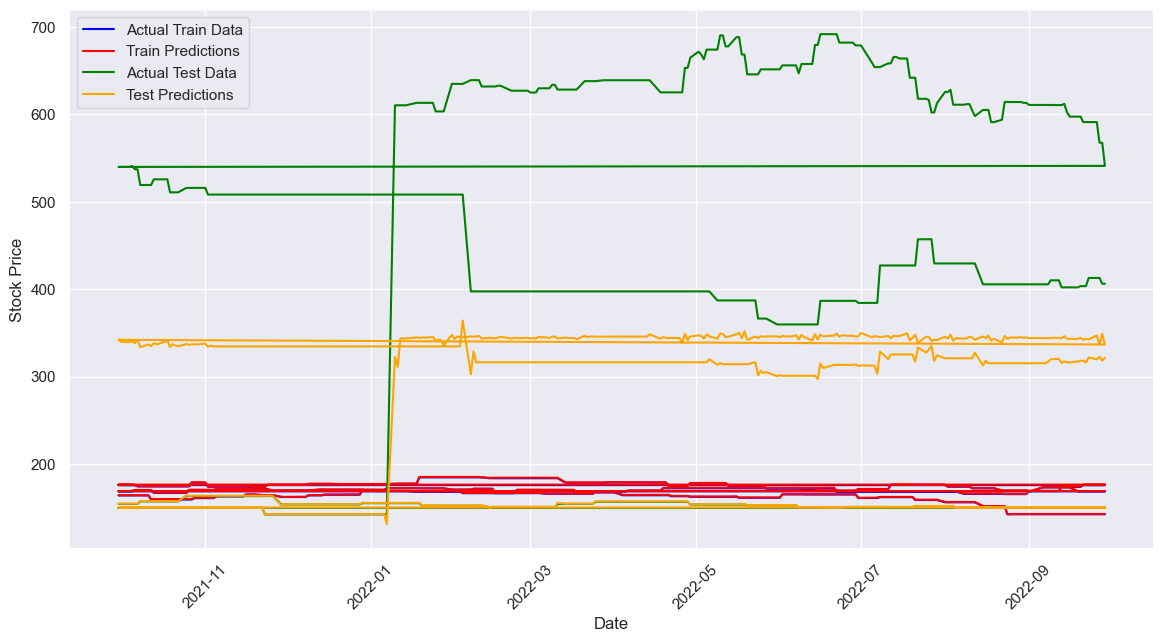

In [360]:
import matplotlib.pyplot as plt

# Plot the results with dates on the x-axis
plt.figure(figsize=(14, 7))
plt.plot(filtered_stock_yfinance_data['Date'], Y_train[:len(filtered_stock_yfinance_data)], color='blue', label='Actual Train Data')
plt.plot(filtered_stock_yfinance_data['Date'], train_predictions[:len(filtered_stock_yfinance_data)], color='red', label='Train Predictions')
plt.plot(filtered_stock_yfinance_data['Date'], Y_test[:len(filtered_stock_yfinance_data)], color='green', label='Actual Test Data')
plt.plot(filtered_stock_yfinance_data['Date'], test_predictions[:len(filtered_stock_yfinance_data)], color='orange', label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()




# Preprocessing

In [7]:


# Load the tweets data
stock_tweets = pd.read_csv('stock_tweets.csv')

# Filter tweet data for NFLX , AAPL and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Text preprocessing function
def preprocess_tweet(tweet):
    '''Clean text data, removing special characters and URLs'''
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove RT (retweet) text
    tweet = re.sub('RT @\w+: ', '', tweet)
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    # Remove special characters and punctuation
    tweet = re.sub(r"[^\w\s]", '', tweet)
    return tweet

def remove_emoticons(tweet):
    # Define emoticon pattern
    emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002700-\U000027BF\U00002600-\U000026FF\U00002B50\U00002B55\U0001F004\U0001F0CF\U0001F18E\U0001F191-\U0001F19A\U0001F1E6-\U0001F1FF\U0001F201\U0001F202\U0001F21A\U0001F22F\U0001F232-\U0001F23A\U0001F250-\U0001F251\U0001F300-\U0001F320\U0001F321-\U0001F32C\U0001F32D-\U0001F32F\U0001F330-\U0001F335\U0001F336\U0001F337-\U0001F37C\U0001F37D\U0001F37E-\U0001F37F\U0001F380-\U0001F393\U0001F394-\U0001F39F\U0001F3A0-\U0001F3C4\U0001F3C5-\U0001F3C7]'
    # Remove emoticons using regex
    return re.sub(emoticon_pattern, '', text)


# Print cleaned tweets
for tweet in filtered_stock_tweets['Tweet']:
    cleaned_tweet = preprocess_tweet(tweet)
    print(cleaned_tweet)


a group of lawmakers led by sen elizabeth warren dmass is asking the federal trade commission to reject amazons amzn proposed acquisition of irobot per a letter shared first with axios
nio just because im down money doesnt mean this is a bad investment the whole market everything sucks right now 25 years from now im confident it will pay off long the best aapl amzn tsla googl nio
todays drop in spx is a perfect example of what happens when aapl and amzn turn lower

there are a few names that have held up markets for years

those names are finally dropping and we are beginning to see the damage

no healthy market is driven by just a few names
druckenmiller owned cvna this year 
munger bought baba on margin 
aswath dean of valuation damodoran loved amzn and meta all year 

no one is safe from investing losses but be wary of anyone always on the right side of every trade 

and theres a long list on this bird app
top 10 qqq holdings 

and credit rating

aapl  aaa
msft  aaa
amzn  a1
tsla  b

In [8]:

# Download VADER lexicon 
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a given text
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply sentiment analysis to each tweet and store the scores
filtered_stock_tweets['Sentiment Scores'] = filtered_stock_tweets['Tweet'].apply(get_sentiment_scores)

# Extract individual sentiment scores and assign them to separate columns
filtered_stock_tweets['Compound'] = filtered_stock_tweets['Sentiment Scores'].apply(lambda x: x['compound'])
filtered_stock_tweets['Positive'] = filtered_stock_tweets['Sentiment Scores'].apply(lambda x: x['pos'])
filtered_stock_tweets['Negative'] = filtered_stock_tweets['Sentiment Scores'].apply(lambda x: x['neg'])
filtered_stock_tweets['Neutral'] = filtered_stock_tweets['Sentiment Scores'].apply(lambda x: x['neu'])

# Drop the 'Sentiment Scores' column if not needed anymore
filtered_stock_tweets.drop(columns=['Sentiment Scores'], inplace=True)

# Display the updated tweet dataset with sentiment scores
print(filtered_stock_tweets.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/debasmitamohanty/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                            Date  \
48351  2022-09-29 22:40:47+00:00   
48352  2022-09-29 22:23:54+00:00   
48353  2022-09-29 18:34:51+00:00   
48354  2022-09-29 15:57:59+00:00   
48355  2022-09-29 15:10:30+00:00   

                                                   Tweet Stock Name  \
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN   
48352  $NIO just because I'm down money doesn't mean ...       AMZN   
48353  Today’s drop in $SPX is a perfect example of w...       AMZN   
48354  Druckenmiller owned $CVNA this year \nMunger b...       AMZN   
48355  Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...       AMZN   

           Company Name  Compound  Positive  Negative  Neutral  
48351  Amazon.com, Inc.   -0.0772     0.075     0.084    0.841  
48352  Amazon.com, Inc.    0.2500     0.158     0.158    0.684  
48353  Amazon.com, Inc.   -0.3182     0.108     0.164    0.728  
48354  Amazon.com, Inc.    0.2382     0.083     0.065    0.851  
48355  Amazon.com, Inc.    0.77

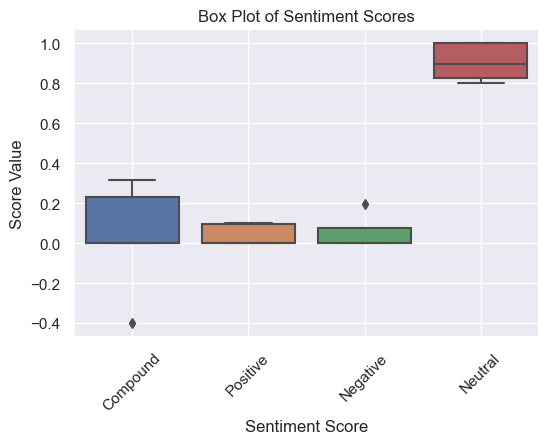

In [275]:

# Filtered stock tweets DataFrame
filtered_stock_tweets = filtered_stock_tweets.head()

# Select sentiment score columns
sentiment_scores = filtered_stock_tweets[['Compound', 'Positive', 'Negative', 'Neutral']]

# Create box plots
plt.figure(figsize=(6, 4))
sns.boxplot(data=sentiment_scores)
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Score Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Compound maximum is 0.3 and minimum is 0.0, we seee outliers at -0.4 and for positive score minimum is 0.0 and maximum 
##0.1, for  negative sentiment scores maximum is 0.05 and minimum is 0.0, outliers is at 0.2. For Neutral scores
## minimum is 0.8 and maximum is 1.0

In [9]:




# Display the DataFrame with tweets and sentiment scores
print(filtered_stock_tweets)


                            Date  \
48351  2022-09-29 22:40:47+00:00   
48352  2022-09-29 22:23:54+00:00   
48353  2022-09-29 18:34:51+00:00   
48354  2022-09-29 15:57:59+00:00   
48355  2022-09-29 15:10:30+00:00   
...                          ...   
62736  2021-09-30 23:07:48+00:00   
62737  2021-09-30 22:53:50+00:00   
62738  2021-09-30 18:01:19+00:00   
62739  2021-09-30 07:01:39+00:00   
62740  2021-09-30 02:12:45+00:00   

                                                   Tweet Stock Name  \
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN   
48352  $NIO just because I'm down money doesn't mean ...       AMZN   
48353  Today’s drop in $SPX is a perfect example of w...       AMZN   
48354  Druckenmiller owned $CVNA this year \nMunger b...       AMZN   
48355  Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...       AMZN   
...                                                  ...        ...   
62736  New billboard out on Sunset Blvd. today from $...       NFLX   

In [10]:


def remove_emoticons(tweet):
    # Define emoticon pattern
    emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002700-\U000027BF\U00002600-\U000026FF\U00002B50\U00002B55\U0001F004\U0001F0CF\U0001F18E\U0001F191-\U0001F19A\U0001F1E6-\U0001F1FF\U0001F201\U0001F202\U0001F21A\U0001F22F\U0001F232-\U0001F23A\U0001F250-\U0001F251\U0001F300-\U0001F320\U0001F321-\U0001F32C\U0001F32D-\U0001F32F\U0001F330-\U0001F335\U0001F336\U0001F337-\U0001F37C\U0001F37D\U0001F37E-\U0001F37F\U0001F380-\U0001F393\U0001F394-\U0001F39F\U0001F3A0-\U0001F3C4\U0001F3C5-\U0001F3C7]'
    # Remove emoticons using regex
    return re.sub(emoticon_pattern, '', tweet)

# Apply the remove_emoticons function to the 'Tweet' column
filtered_stock_tweets['Tweet'] = filtered_stock_tweets['Tweet'].apply(remove_emoticons)


In [11]:


# Display the DataFrame
display(filtered_stock_tweets)



Date  \
48351  2022-09-29 22:40:47+00:00   
48352  2022-09-29 22:23:54+00:00   
48353  2022-09-29 18:34:51+00:00   
48354  2022-09-29 15:57:59+00:00   
48355  2022-09-29 15:10:30+00:00   
...                          ...   
62736  2021-09-30 23:07:48+00:00   
62737  2021-09-30 22:53:50+00:00   
62738  2021-09-30 18:01:19+00:00   
62739  2021-09-30 07:01:39+00:00   
62740  2021-09-30 02:12:45+00:00   

                                                   Tweet Stock Name  \
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN   
48352  $NIO just because I'm down money doesn't mean ...       AMZN   
48353  Today’s drop in $SPX is a perfect example of w...       AMZN   
48354  Druckenmiller owned $CVNA this year \nMunger b...       AMZN   
48355  Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...       AMZN   
...                                                  ...        ...   
62736  New billboard out on Sunset Blvd. today from $...       NFLX   
62737  ️#LottoFriday️\n\nHigh risk, secure profits!\n...       NFLX   
62738  Returns over the last 10 Years:\n\nBitcoin $BT...       NFLX   
62739  You got to love this motivational quote. Netfl...       NFLX   
62740                     $NFLX  https://t.co/xPbataRtRh       NFLX   

           Company Name  Compound  Positive  Negative  Neutral  
48351  Amazon.com, Inc.   -0.0772     0.075     0.084    0.841  
48352  Amazon.com, Inc.    0.2500     0.158     0.158    0.684  
48353  Amazon.com, Inc.   -0.3182     0.108     0.164    0.728  
48354  Amazon.com, Inc.    0.2382     0.083     0.065    0.851  
48355  Amazon.com, Inc.    0.7783     0.201     0.000    0.799  
...                 ...       ...       ...       ...      ...  
62736     Netflix, Inc.    0.0000     0.000     0.000    1.000  
62737     Netflix, Inc.    0.8168     0.210     0.046    0.744  
62738     Netflix, Inc.   -0.2263     0.091     0.089    0.821  
62739     Netflix, Inc.    0.6369     0.318     0.000    0.682  
62740     Netflix, Inc.    0.0000     0.000     0.000    1.000  

[10872 rows x 8 columns]

In [12]:
len(filtered_stock_tweets)

10872

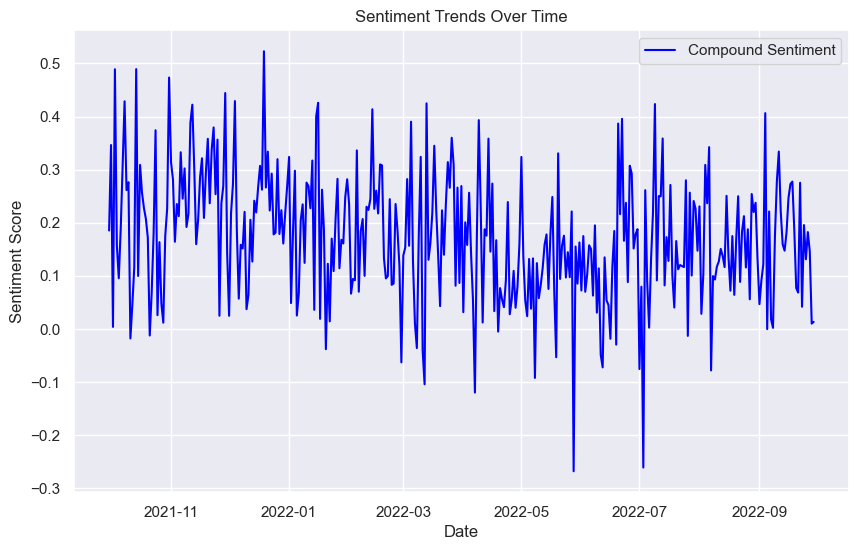

In [13]:


# Convert 'Date' column to datetime format if it's not already in datetime format
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])

# Group by date and calculate average sentiment score
sentiment_trends = filtered_stock_tweets.groupby(pd.Grouper(key='Date', freq='D')).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends.index, sentiment_trends['Compound'], color='blue', label='Compound Sentiment')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


# EDA(Exploratory Data Analysis)

# Simple Moving Average to see the trend of Compound sentiment score

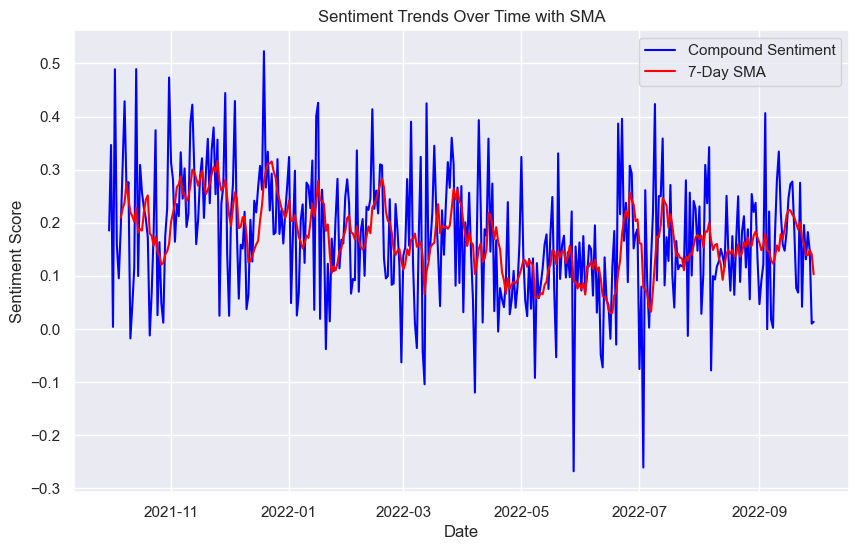

In [14]:
# sentiment_trends is the DataFrame with date index and compound sentiment scores
window_size = 7  # Define the window size for the moving average

# Calculate the Simple Moving Average (SMA)
sentiment_trends['SMA'] = sentiment_trends['Compound'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends.index, sentiment_trends['Compound'], color='blue', label='Compound Sentiment')
plt.plot(sentiment_trends.index, sentiment_trends['SMA'], color='red', label=f'{window_size}-Day SMA')
plt.title('Sentiment Trends Over Time with SMA')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


We see initially compound score is upward trend and slowly it became downward trend and then again it started upward trend.

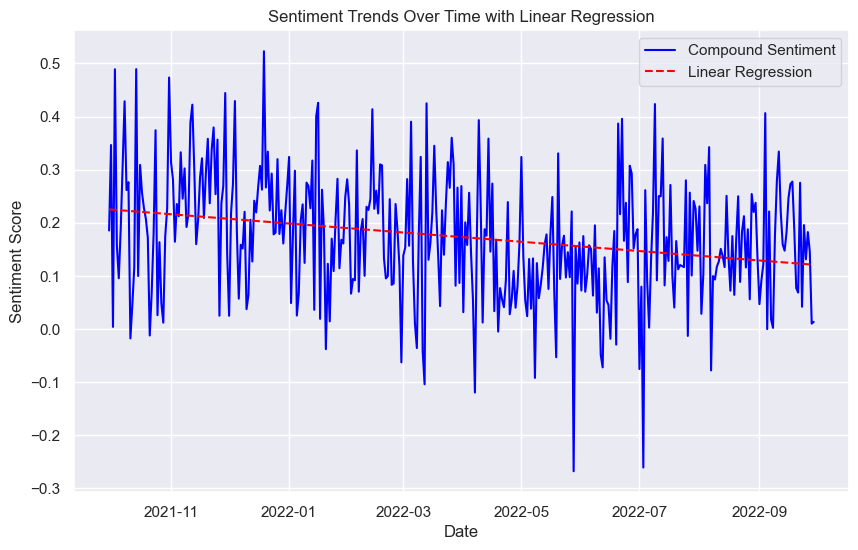

Linear Regression Equation: Compound Score = -0.0000 * Date + 5.6337


In [15]:

# Register matplotlib converters to avoid warning
register_matplotlib_converters()

# Assuming sentiment_trends is your DataFrame with date index and compound sentiment scores
# Extract features (date) and target (compound score)
X = np.array([date.timestamp() for date in sentiment_trends.index]).reshape(-1, 1)  # Convert date index to Unix timestamp and then to numpy array
y = sentiment_trends['Compound']

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends.index, sentiment_trends['Compound'], color='blue', label='Compound Sentiment')
plt.plot(sentiment_trends.index, model.predict(X), color='red', linestyle='--', label='Linear Regression')
plt.title('Sentiment Trends Over Time with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"Linear Regression Equation: Compound Score = {slope:.4f} * Date + {intercept:.4f}")


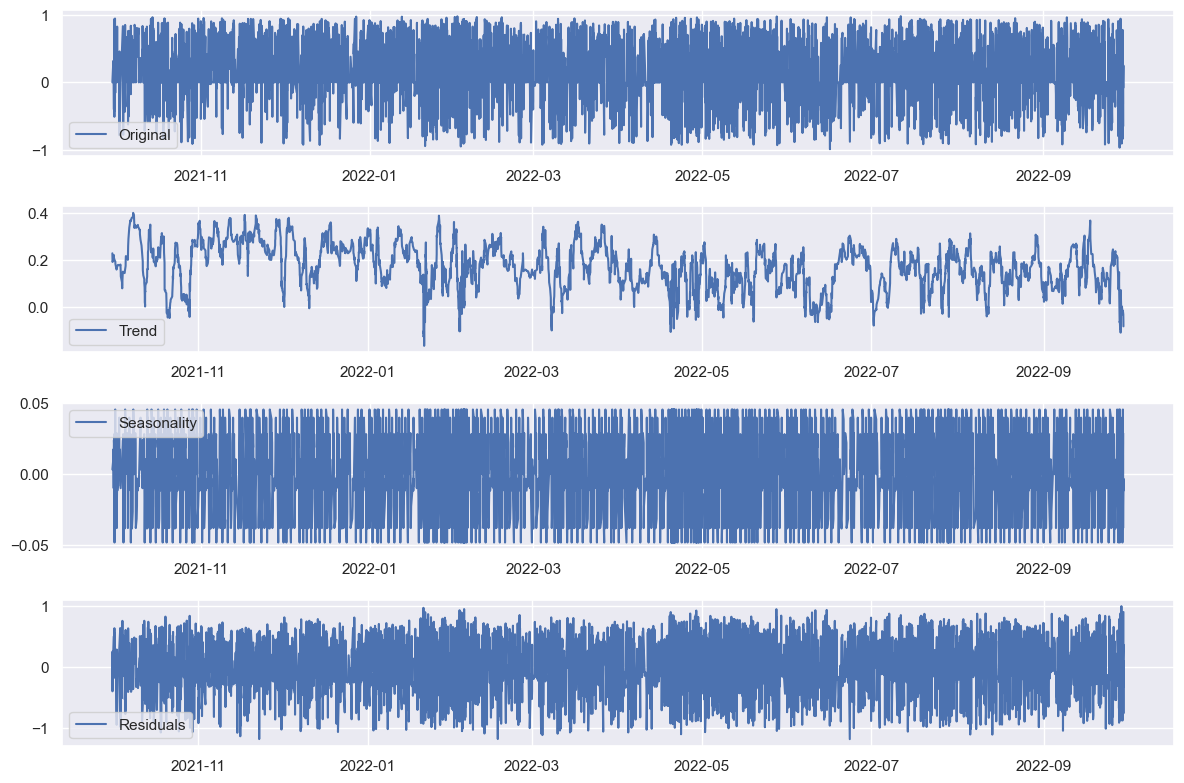

In [276]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(sentiment_trends['Compound'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sentiment_trends['Compound'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


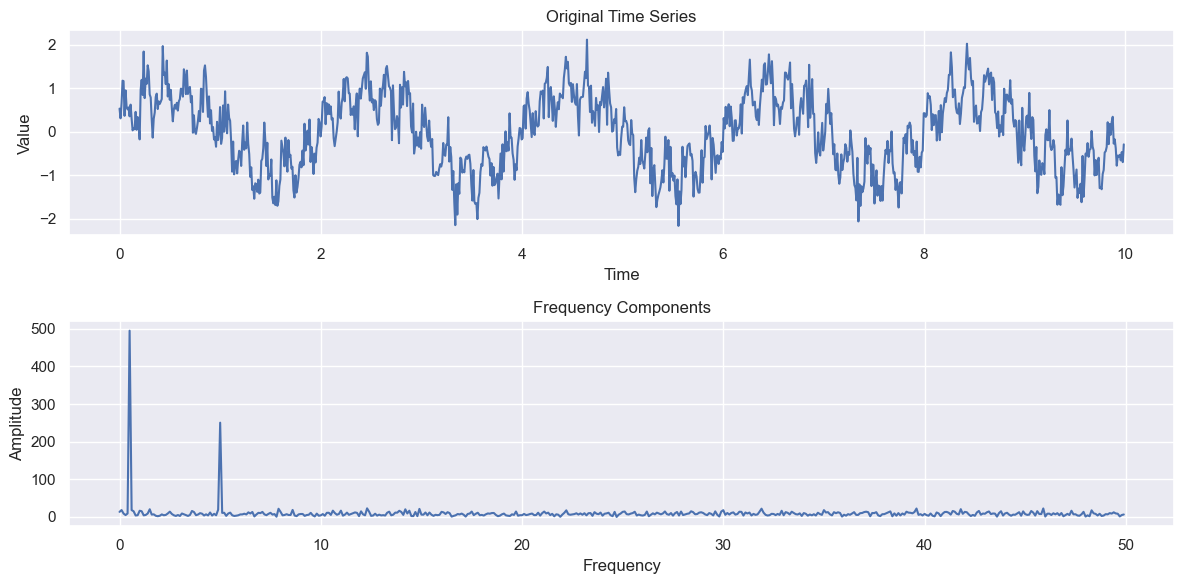

In [277]:

# Generate a sample time series with both low and high-frequency components
np.random.seed(0)
time = np.arange(0, 10, 0.01)
low_freq_signal = np.sin(2 * np.pi * 0.5 * time)  # Low frequency component
high_freq_signal = 0.5 * np.sin(2 * np.pi * 5 * time)  # High frequency component
noise = 0.3 * np.random.normal(size=len(time))  # Noise component
time_series = low_freq_signal + high_freq_signal + noise

# Perform Fast Fourier Transform (FFT)
fft_result = fft(time_series)
frequencies = fftfreq(len(time_series), 0.01)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, time_series)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the FFT result
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
plt.title('Frequency Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [16]:

# Calculate daily returns of sentiment scores
filtered_stock_tweets['Daily_Return'] = filtered_stock_tweets['Compound'].pct_change()

# Compute standard deviation
sentiment_volatility = filtered_stock_tweets['Daily_Return'].rolling(window=7).std()

# Print or plot the volatility values
print(sentiment_volatility)


48351   NaN
48352   NaN
48353   NaN
48354   NaN
48355   NaN
         ..
62736   NaN
62737   NaN
62738   NaN
62739   NaN
62740   NaN
Name: Daily_Return, Length: 10872, dtype: float64


In [17]:

# Convert 'Date' column to datetime format
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])

# Sort DataFrame by 'Date'
filtered_stock_tweets.sort_values(by='Date', inplace=True)

# Calculate daily return
filtered_stock_tweets['Daily_Return'] = filtered_stock_tweets['Compound'].pct_change()

# Replace 'inf' and '-inf' values with NaN
filtered_stock_tweets['Daily_Return'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values from the DataFrame
filtered_stock_tweets.dropna(subset=['Daily_Return'], inplace=True)

# Display the DataFrame with daily returns
print(filtered_stock_tweets[['Date', 'Compound', 'Daily_Return']])



                           Date  Compound  Daily_Return
62740 2021-09-30 02:12:45+00:00    0.0000     -1.000000
61013 2021-09-30 10:19:31+00:00    0.3182     -0.500393
61012 2021-09-30 10:22:53+00:00    0.2296     -0.278441
61011 2021-09-30 13:36:10+00:00    0.0000     -1.000000
61009 2021-09-30 15:37:52+00:00   -0.4019     -1.843088
...                         ...       ...           ...
55961 2022-09-29 20:13:48+00:00   -0.2500     -0.616741
55960 2022-09-29 20:19:43+00:00    0.0000     -1.000000
48352 2022-09-29 22:23:54+00:00    0.2500     -0.307863
55958 2022-09-29 22:23:54+00:00    0.2500      0.000000
48351 2022-09-29 22:40:47+00:00   -0.0772     -1.308800

[7567 rows x 3 columns]


In [18]:
# Calculate z-score
filtered_stock_tweets['Z_Score'] = (filtered_stock_tweets['Daily_Return'] - filtered_stock_tweets['Daily_Return'].mean()) / filtered_stock_tweets['Daily_Return'].std()

# Define threshold for identifying outliers
threshold = 3  # You can adjust this threshold based on your data distribution

# Filter out rows with absolute z-score exceeding the threshold
filtered_stock_tweets = filtered_stock_tweets[abs(filtered_stock_tweets['Z_Score']) <= threshold]

# Drop the 'Z_Score' column
filtered_stock_tweets.drop(columns=['Z_Score'], inplace=True)

# Display the DataFrame without outliers
print(filtered_stock_tweets[['Date', 'Compound', 'Daily_Return']])


                           Date  Compound  Daily_Return
62740 2021-09-30 02:12:45+00:00    0.0000     -1.000000
61013 2021-09-30 10:19:31+00:00    0.3182     -0.500393
61012 2021-09-30 10:22:53+00:00    0.2296     -0.278441
61011 2021-09-30 13:36:10+00:00    0.0000     -1.000000
61009 2021-09-30 15:37:52+00:00   -0.4019     -1.843088
...                         ...       ...           ...
55961 2022-09-29 20:13:48+00:00   -0.2500     -0.616741
55960 2022-09-29 20:19:43+00:00    0.0000     -1.000000
48352 2022-09-29 22:23:54+00:00    0.2500     -0.307863
55958 2022-09-29 22:23:54+00:00    0.2500      0.000000
48351 2022-09-29 22:40:47+00:00   -0.0772     -1.308800

[7532 rows x 3 columns]


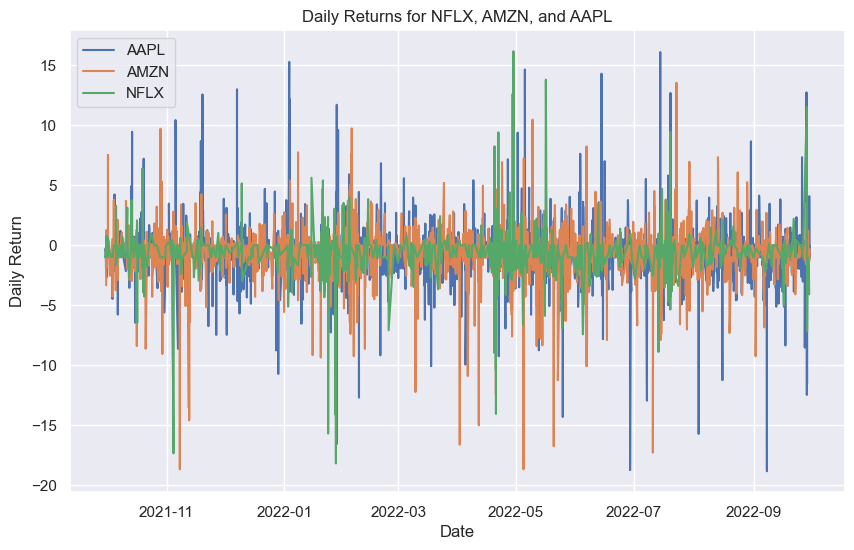

In [19]:
# Filter DataFrame for NFLX, AMZN, and AAPL
selected_stocks = ['NFLX', 'AMZN', 'AAPL']
filtered_stocks_df = filtered_stock_tweets[filtered_stock_tweets['Stock Name'].isin(selected_stocks)]

# Plot daily returns for each stock
plt.figure(figsize=(10, 6))
for stock_name, group in filtered_stocks_df.groupby('Stock Name'):
    plt.plot(group['Date'], group['Daily_Return'], label=stock_name)

plt.title('Daily Returns for NFLX, AMZN, and AAPL')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


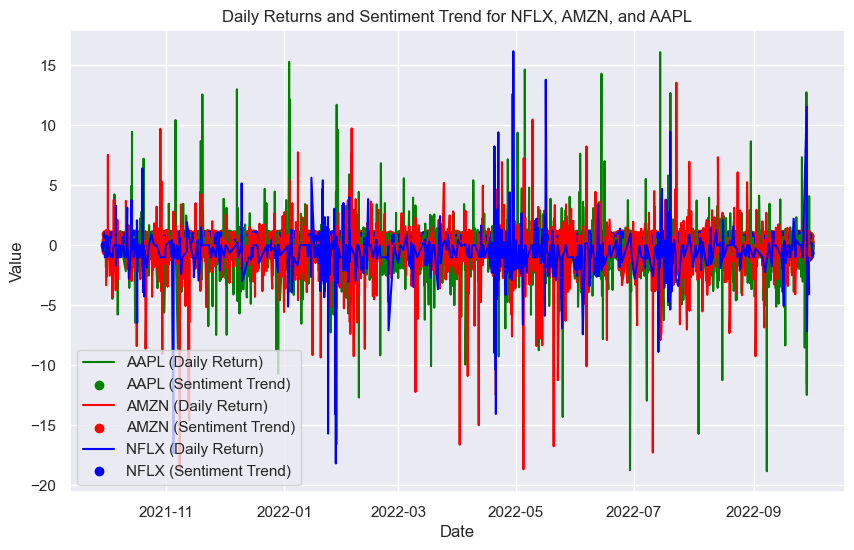

In [20]:
import matplotlib.pyplot as plt

# Define colors for each stock
colors = {'NFLX': 'blue', 'AMZN': 'red', 'AAPL': 'green'}

# Plot daily returns for each stock
plt.figure(figsize=(10, 6))
for stock_name, group in filtered_stocks_df.groupby('Stock Name'):
    # Plot daily returns
    plt.plot(group['Date'], group['Daily_Return'], color=colors[stock_name], label=f'{stock_name} (Daily Return)')
    
    # Plot sentiment trend
    plt.scatter(group['Date'], group['Compound'], color=colors[stock_name], label=f'{stock_name} (Sentiment Trend)')

plt.title('Daily Returns and Sentiment Trend for NFLX, AMZN, and AAPL')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


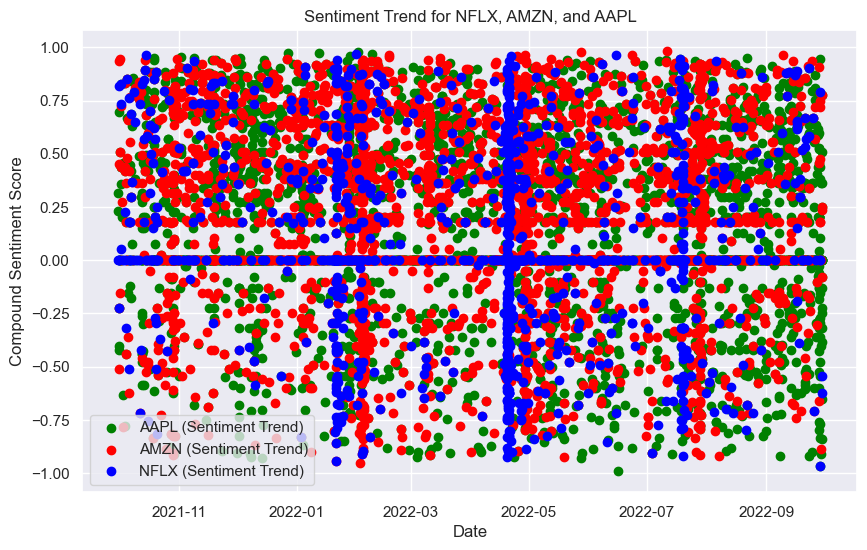

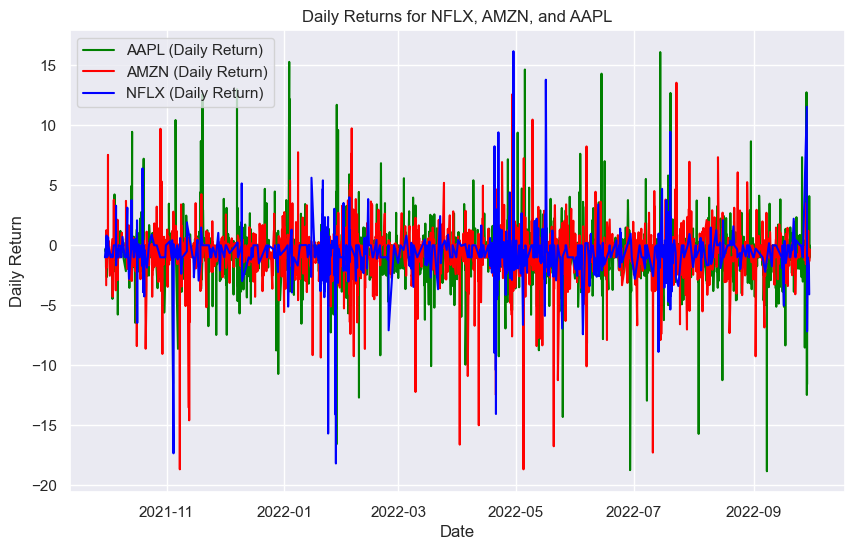

In [21]:
import matplotlib.pyplot as plt

# Define colors for each stock
colors = {'NFLX': 'blue', 'AMZN': 'red', 'AAPL': 'green'}

# Plot sentiment trend for each stock
plt.figure(figsize=(10, 6))
for stock_name, group in filtered_stocks_df.groupby('Stock Name'):
    # Plot sentiment trend
    plt.scatter(group['Date'], group['Compound'], color=colors[stock_name], label=f'{stock_name} (Sentiment Trend)')

plt.title('Sentiment Trend for NFLX, AMZN, and AAPL')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot daily returns for each stock
plt.figure(figsize=(10, 6))
for stock_name, group in filtered_stocks_df.groupby('Stock Name'):
    # Plot daily returns
    plt.plot(group['Date'], group['Daily_Return'], color=colors[stock_name], label=f'{stock_name} (Daily Return)')

plt.title('Daily Returns for NFLX, AMZN, and AAPL')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
display(filtered_stock_tweets)

Date  \
62740 2021-09-30 02:12:45+00:00   
61013 2021-09-30 10:19:31+00:00   
61012 2021-09-30 10:22:53+00:00   
61011 2021-09-30 13:36:10+00:00   
61009 2021-09-30 15:37:52+00:00   
...                         ...   
55961 2022-09-29 20:13:48+00:00   
55960 2022-09-29 20:19:43+00:00   
48352 2022-09-29 22:23:54+00:00   
55958 2022-09-29 22:23:54+00:00   
48351 2022-09-29 22:40:47+00:00   

                                                   Tweet Stock Name  \
62740                     $NFLX  https://t.co/xPbataRtRh       NFLX   
61013  I bought my first $AAPL stock in 2010. \n\nSin...       AAPL   
61012  The media is really pushing hard for their big...       AAPL   
61011  In 2020, Tim Cook, CEO of $AAPL, earned $265,0...       AAPL   
61009  All about this trendline now on $AAPL, continu...       AAPL   
...                                                  ...        ...   
55961  $AAPL was down almost 5% today. Rare to see it...       AAPL   
55960  Not something you see very often.  \n-2 ATR mo...       AAPL   
48352  $NIO just because I'm down money doesn't mean ...       AMZN   
55958  $NIO just because I'm down money doesn't mean ...       AAPL   
48351  A group of lawmakers led by Sen. Elizabeth War...       AMZN   

           Company Name  Compound  Positive  Negative  Neutral  Daily_Return  
62740     Netflix, Inc.    0.0000     0.000     0.000    1.000     -1.000000  
61013        Apple Inc.    0.3182     0.103     0.000    0.897     -0.500393  
61012        Apple Inc.    0.2296     0.095     0.076    0.829     -0.278441  
61011        Apple Inc.    0.0000     0.000     0.000    1.000     -1.000000  
61009        Apple Inc.   -0.4019     0.000     0.197    0.803     -1.843088  
...                 ...       ...       ...       ...      ...           ...  
55961        Apple Inc.   -0.2500     0.119     0.182    0.699     -0.616741  
55960        Apple Inc.    0.0000     0.000     0.000    1.000     -1.000000  
48352  Amazon.com, Inc.    0.2500     0.158     0.158    0.684     -0.307863  
55958        Apple Inc.    0.2500     0.158     0.158    0.684      0.000000  
48351  Amazon.com, Inc.   -0.0772     0.075     0.084    0.841     -1.308800  

[7532 rows x 9 columns]

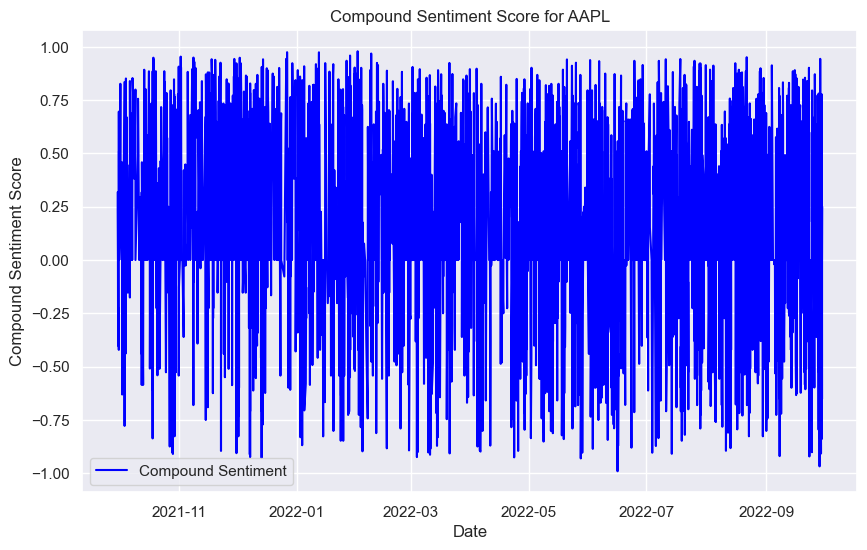

In [24]:


# Filter data for AAPL
aapl_data = filtered_stock_tweets[filtered_stock_tweets['Stock Name'] == 'AAPL']

# Plot compound score for AAPL
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['Date'], aapl_data['Compound'], color='blue', label='Compound Sentiment')
plt.title('Compound Sentiment Score for AAPL')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()





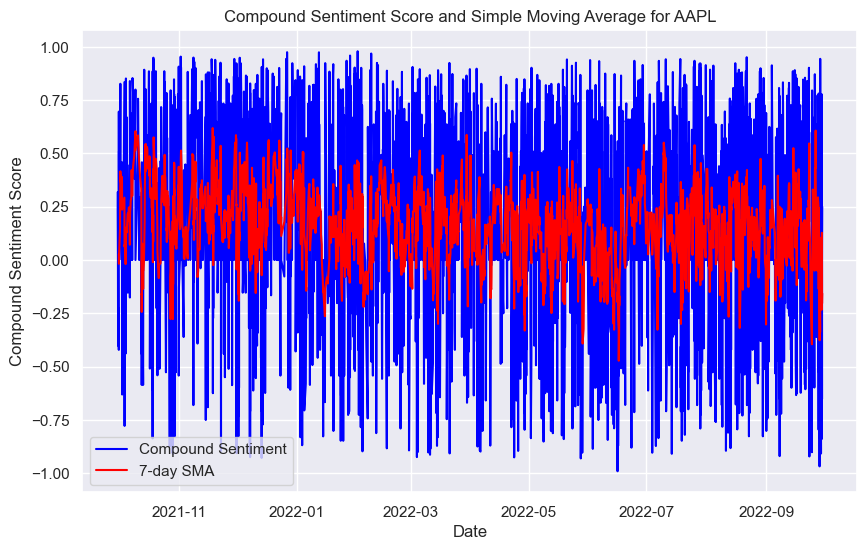

In [25]:
# Calculate Simple Moving Average (SMA) for AAPL's compound score
window_size = 7  
aapl_data['SMA'] = aapl_data['Compound'].rolling(window=window_size).mean()

# Plot compound score and SMA for AAPL
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['Date'], aapl_data['Compound'], color='blue', label='Compound Sentiment')
plt.plot(aapl_data['Date'], aapl_data['SMA'], color='red', label=f'{window_size}-day SMA')
plt.title('Compound Sentiment Score and Simple Moving Average for AAPL')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


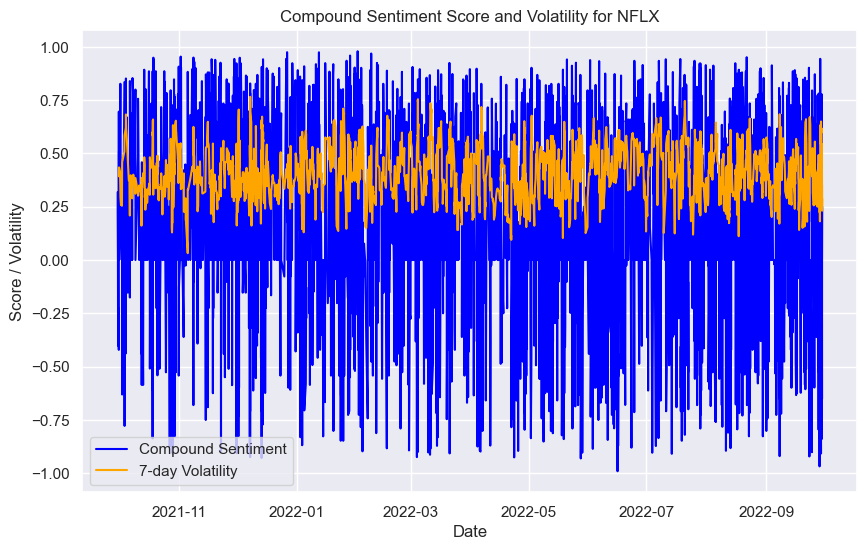

In [26]:
# Calculate the standard deviation of compound scores over a window of time
window_size = 7  # You can adjust the window size as needed
aapl_data['Volatility'] = aapl_data['Compound'].rolling(window=window_size).std()

# Plot compound score and volatility for NFLX
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['Date'], aapl_data['Compound'], color='blue', label='Compound Sentiment')
plt.plot(aapl_data['Date'], aapl_data['Volatility'], color='orange', label=f'{window_size}-day Volatility')
plt.title('Compound Sentiment Score and Volatility for NFLX')
plt.xlabel('Date')
plt.ylabel('Score / Volatility')
plt.legend()
plt.grid(True)
plt.show()


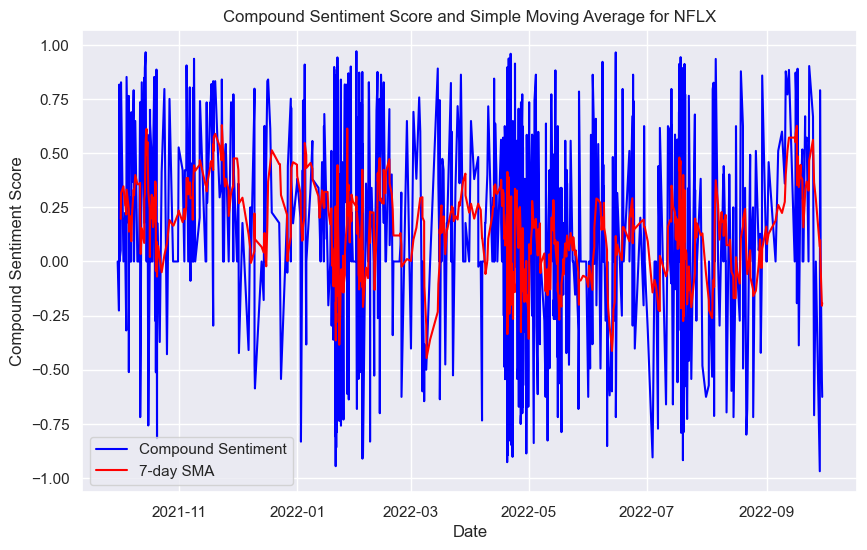

In [28]:
# Calculate Simple Moving Average (SMA) for NFLX's compound score
window_size = 7  # we can adjust the window size as needed
NFLX_data['SMA'] = NFLX_data['Compound'].rolling(window=window_size).mean()

# Plot compound score and SMA for NFLX
plt.figure(figsize=(10, 6))
plt.plot(NFLX_data['Date'], NFLX_data['Compound'], color='blue', label='Compound Sentiment')
plt.plot(NFLX_data['Date'], NFLX_data['SMA'], color='red', label=f'{window_size}-day SMA')
plt.title('Compound Sentiment Score and Simple Moving Average for NFLX')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


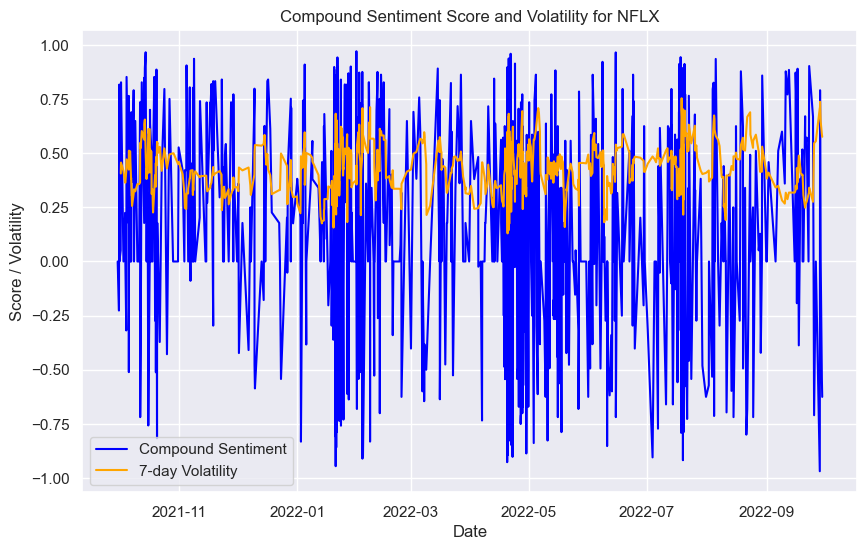

In [29]:
# Calculate the standard deviation of compound scores over a window of time
window_size = 7  # You can adjust the window size as needed
NFLX_data['Volatility'] = NFLX_data['Compound'].rolling(window=window_size).std()

# Plot compound score and volatility for NFLX
plt.figure(figsize=(10, 6))
plt.plot(NFLX_data['Date'], NFLX_data['Compound'], color='blue', label='Compound Sentiment')
plt.plot(NFLX_data['Date'], NFLX_data['Volatility'], color='orange', label=f'{window_size}-day Volatility')
plt.title('Compound Sentiment Score and Volatility for NFLX')
plt.xlabel('Date')
plt.ylabel('Score / Volatility')
plt.legend()
plt.grid(True)
plt.show()


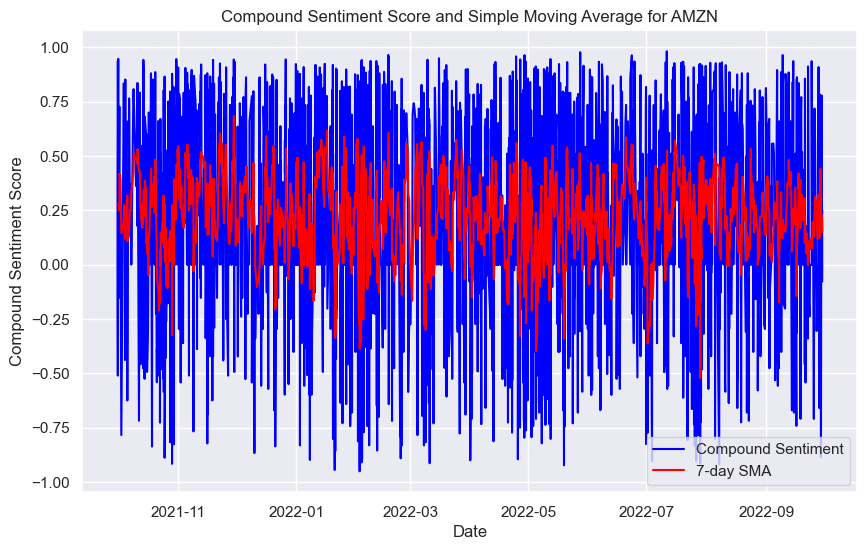

In [31]:
# Calculate Simple Moving Average (SMA) for AMZN's compound score
window_size = 7  # You can adjust the window size as needed
AMZN_data['SMA'] = AMZN_data['Compound'].rolling(window=window_size).mean()

# Plot compound score and SMA for NFLX
plt.figure(figsize=(10, 6))
plt.plot(AMZN_data['Date'], AMZN_data['Compound'], color='blue', label='Compound Sentiment')
plt.plot(AMZN_data['Date'], AMZN_data['SMA'], color='red', label=f'{window_size}-day SMA')
plt.title('Compound Sentiment Score and Simple Moving Average for AMZN')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


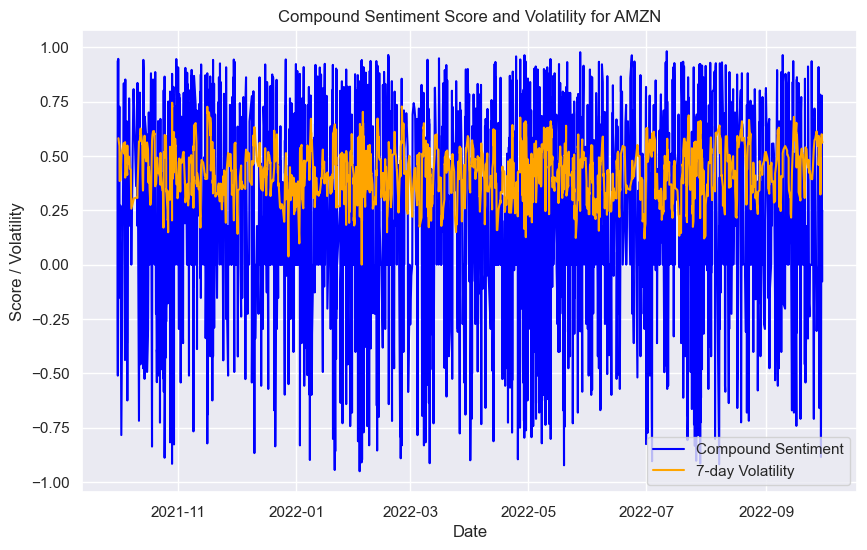

In [32]:
# Calculate the standard deviation of compound scores over a window of time for AMZN
window_size = 7  # You can adjust the window size as needed
AMZN_data['Volatility'] = AMZN_data['Compound'].rolling(window=window_size).std()

# Plot compound score and volatility for AMZN
plt.figure(figsize=(10, 6))
plt.plot(AMZN_data['Date'], AMZN_data['Compound'], color='blue', label='Compound Sentiment')
plt.plot(AMZN_data['Date'], AMZN_data['Volatility'], color='orange', label=f'{window_size}-day Volatility')
plt.title('Compound Sentiment Score and Volatility for AMZN')
plt.xlabel('Date')
plt.ylabel('Score / Volatility')
plt.legend()
plt.grid(True)
plt.show()


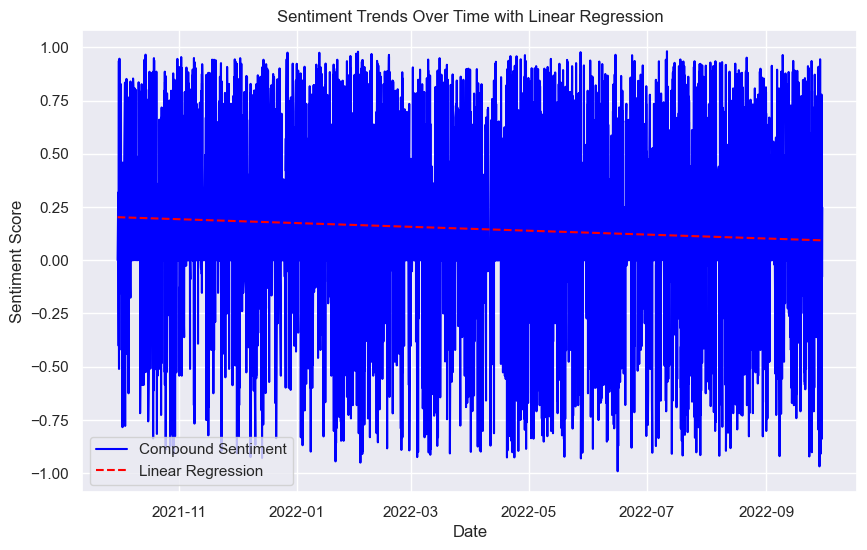

Linear Regression Equation: Compound Score = -0.0000 * Date + 5.8349


In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas.plotting import register_matplotlib_converters

# Register matplotlib converters to avoid warning
register_matplotlib_converters()

# Assuming you have sentiment scores in the filtered_stock_tweets DataFrame
# First, convert the 'Date' column to datetime if it's not already in datetime format
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])

# Aggregate sentiment scores by date
sentiment_trends = filtered_stock_tweets.groupby('Date').mean()

# Extract features (date) and target (compound score)
X = np.array([date.timestamp() for date in sentiment_trends.index]).reshape(-1, 1)  # Convert date index to Unix timestamp and then to numpy array
y = sentiment_trends['Compound']

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends.index, sentiment_trends['Compound'], color='blue', label='Compound Sentiment')
plt.plot(sentiment_trends.index, model.predict(X), color='red', linestyle='--', label='Linear Regression')
plt.title('Sentiment Trends Over Time with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"Linear Regression Equation: Compound Score = {slope:.4f} * Date + {intercept:.4f}")


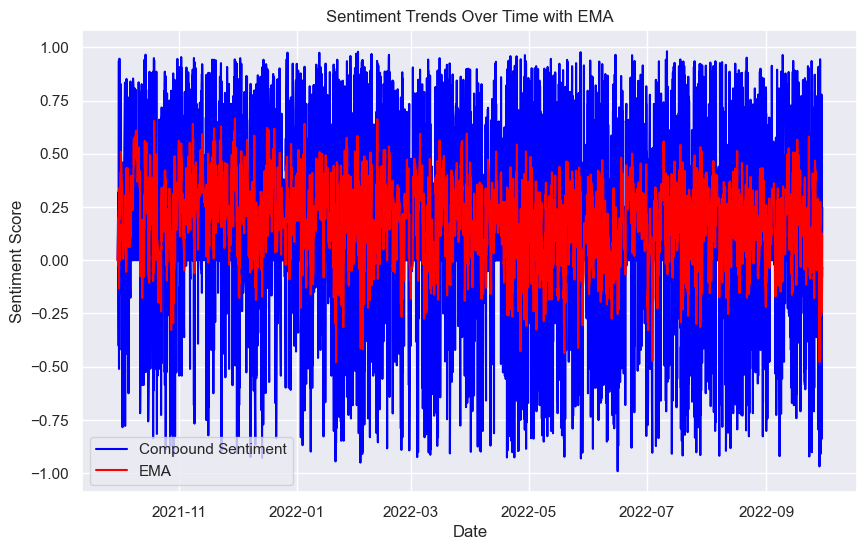

In [34]:
# Calculate Exponential Moving Average (EMA)
alpha = 0.2  #we can adjust the smoothing factor (alpha) as needed
filtered_stock_tweets['EMA'] = filtered_stock_tweets['Compound'].ewm(alpha=alpha).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_stock_tweets['Date'], filtered_stock_tweets['Compound'], color='blue', label='Compound Sentiment')
plt.plot(filtered_stock_tweets['Date'], filtered_stock_tweets['EMA'], color='red', label='EMA')
plt.title('Sentiment Trends Over Time with EMA')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.ow()


Cleaning Stock Data

In [35]:
display ('stock_yfinance_data')

'stock_yfinance_data'

In [36]:
import pandas as pd

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for AAPL,AMZN and NFLX stocks
filtered_stock_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['AMZN', 'NFLX', 'AAPL'])]

# 1. Handling Missing Values
filtered_stock_data.dropna(inplace=True)  # Drop rows with missing values

# 2. Data Type Conversion
filtered_stock_data['Date'] = pd.to_datetime(filtered_stock_data['Date'])

# 3. Removing Duplicates
filtered_stock_data.drop_duplicates(inplace=True)

# 4. Standardizing Column Names (if needed)
filtered_stock_data.columns = filtered_stock_data.columns.str.strip().str.lower().str.replace(' ', '_')



# Display the cleaned DataFrame
print(filtered_stock_data.head())


           date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   

        volume stock_name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  


In [37]:
# Check for missing values in stock_yfinance_data
missing_values = stock_yfinance_data.isnull().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stock Name    0
dtype: int64


In [38]:
print(filtered_stock_data.tail())

           date        open        high         low       close   adj_close  \
2263 2022-09-23  235.139999  236.449997  221.429993  226.410004  226.410004   
2264 2022-09-26  225.600006  232.699997  223.009995  224.070007  224.070007   
2265 2022-09-27  228.630005  230.639999  220.720001  224.360001  224.360001   
2266 2022-09-28  229.690002  246.649994  227.380005  245.199997  245.199997   
2267 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   

        volume stock_name  
2263  11207200       NFLX  
2264   8234300       NFLX  
2265   7762200       NFLX  
2266  17579700       NFLX  
2267  18994900       NFLX  


In [39]:
display (filtered_stock_data)

date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   
...         ...         ...         ...         ...         ...         ...   
2263 2022-09-23  235.139999  236.449997  221.429993  226.410004  226.410004   
2264 2022-09-26  225.600006  232.699997  223.009995  224.070007  224.070007   
2265 2022-09-27  228.630005  230.639999  220.720001  224.360001  224.360001   
2266 2022-09-28  229.690002  246.649994  227.380005  245.199997  245.199997   
2267 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   

        volume stock_name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  
...        ...        ...  
2263  11207200       NFLX  
2264   8234300       NFLX  
2265   7762200       NFLX  
2266  17579700       NFLX  
2267  18994900       NFLX  

[756 rows x 8 columns]

In [40]:
# For filtered_stock_data
print(filtered_stock_data.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'stock_name'],
      dtype='object')


# ARIMA Analysis

In [41]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Example: plot_acf(stock_yfinance_data['Close'], lags=20) for 20 lags


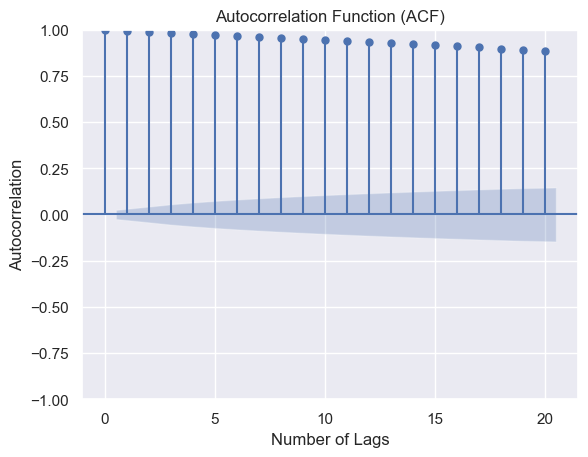

In [285]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'stock_yfinance_data' is your DataFrame with a 'Close' column for the closing prices

# Plot ACF for up to 20 lags
plot_acf(stock_yfinance_data['Close'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Autocorrelation')
plt.show()


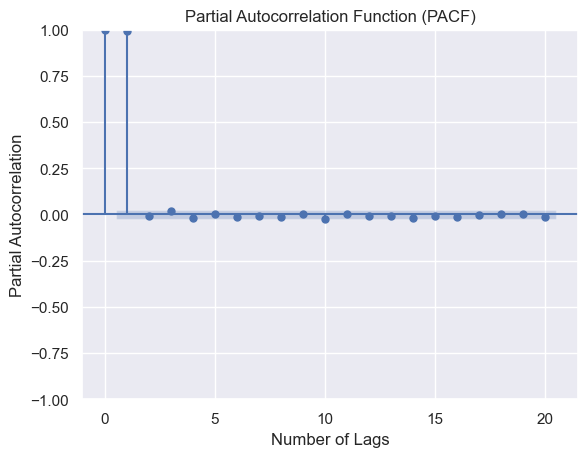

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for up to 20 lags
plot_pacf(stock_yfinance_data['Close'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


since spikes ends at 1 we will consider d = 1

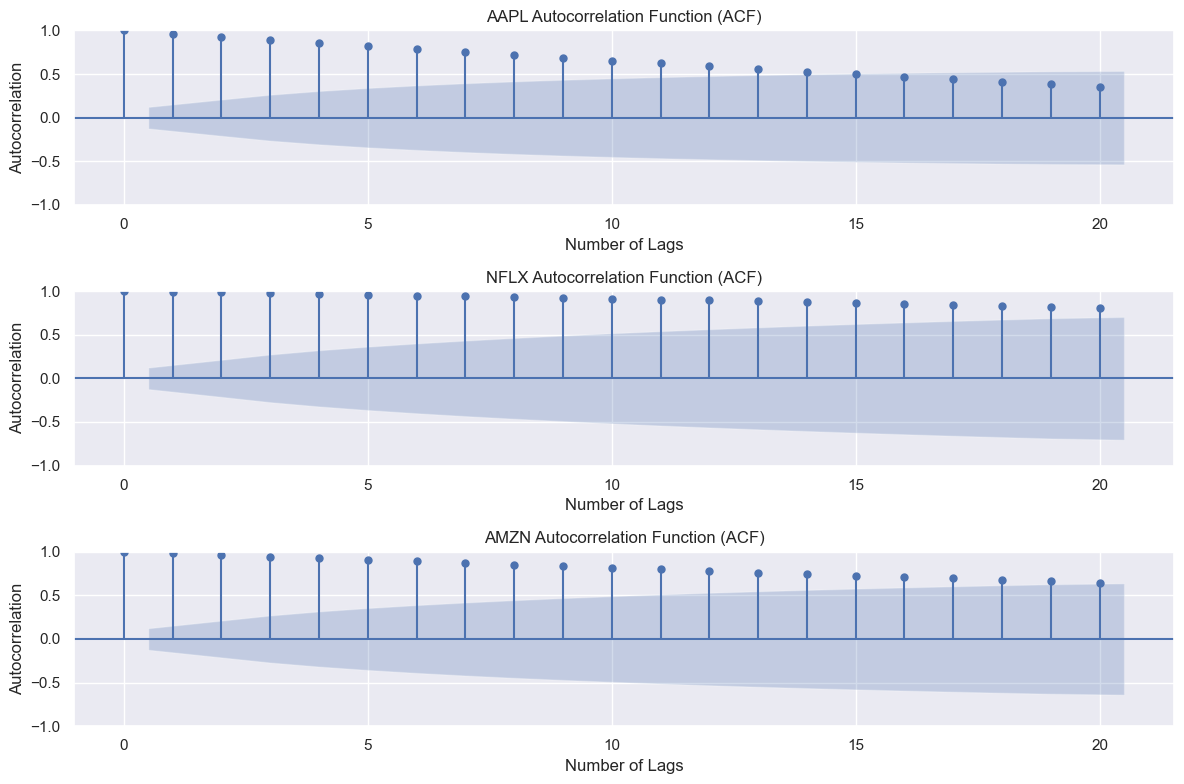

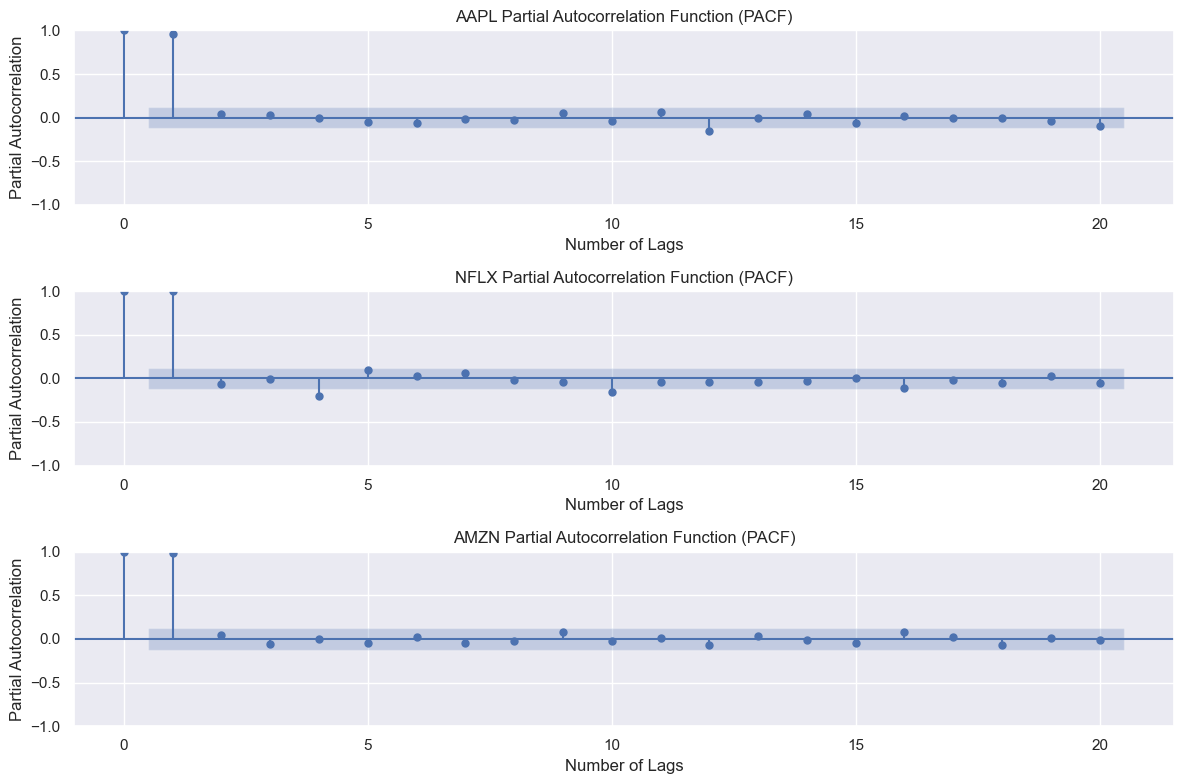

In [53]:

# Load  data for each stock
# Assuming 'filtered_stock_data' contains the filtered stock data
aapl_data = filtered_stock_data[filtered_stock_data['stock_name'] == 'AAPL']
nflx_data = filtered_stock_data[filtered_stock_data['stock_name'] == 'NFLX']
amzn_data = filtered_stock_data[filtered_stock_data['stock_name'] == 'AMZN']

# Preprocessing for each stock
# Remove duplicates (if not done already)
aapl_data = aapl_data.drop_duplicates()
nflx_data = nflx_data.drop_duplicates()
amzn_data = amzn_data.drop_duplicates()

# Drop missing values (if not done already)
aapl_data = aapl_data.dropna()
nflx_data = nflx_data.dropna()
amzn_data = amzn_data.dropna()

# Plot ACF for each stock
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plot_acf(aapl_data['close'], lags=20, ax=plt.gca())
plt.title('AAPL Autocorrelation Function (ACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Autocorrelation')

plt.subplot(3, 1, 2)
plot_acf(nflx_data['close'], lags=20, ax=plt.gca())
plt.title('NFLX Autocorrelation Function (ACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Autocorrelation')

plt.subplot(3, 1, 3)
plot_acf(amzn_data['close'], lags=20, ax=plt.gca())
plt.title('AMZN Autocorrelation Function (ACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

# Plot PACF for each stock
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plot_pacf(aapl_data['close'], lags=20, ax=plt.gca())
plt.title('AAPL Partial Autocorrelation Function (PACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Partial Autocorrelation')

plt.subplot(3, 1, 2)
plot_pacf(nflx_data['close'], lags=20, ax=plt.gca())
plt.title('NFLX Partial Autocorrelation Function (PACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Partial Autocorrelation')

plt.subplot(3, 1, 3)
plot_pacf(amzn_data['close'], lags=20, ax=plt.gca())
plt.title('AMZN Partial Autocorrelation Function (PACF)')
plt.xlabel('Number of Lags')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()






In [54]:
# Fit SARIMA model for AAPL
aapl_model = SARIMAX(aapl_data['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
aapl_result = aapl_model.fit()

# Fit SARIMA model for NFLX
nflx_model = SARIMAX(nflx_data['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
nflx_result = nflx_model.fit()

# Fit SARIMA model for AMZN
amzn_model = SARIMAX(amzn_data['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
amzn_result = amzn_model.fit()

# Print model summaries for each stock
print("AAPL Model Summary:")
print(aapl_result.summary())

print("\nNFLX Model Summary:")
print(nflx_result.summary())

print("\nAMZN Model Summary:")
print(amzn_result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59926D+00    |proj g|=  9.02654D-02

At iterate    5    f=  2.50709D+00    |proj g|=  1.64359D-02

At iterate   10    f=  2.50448D+00    |proj g|=  3.70065D-04

At iterate   15    f=  2.50444D+00    |proj g|=  2.55334D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     23      1     0     0   1.583D-06   2.504D+00
  F =   2.5044402114037441     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.01812D+00    |proj g|=  1.97797D-02

At iterate   10    f=  3.95453D+00    |proj g|=  7.24280D-03

At iterate   15    f=  3.95448D+00    |proj g|=  2.32849D-03

At iterate   20    f=  3.94689D+00    |proj g|=  2.40409D-02

At iterate   25    f=  3.94164D+00    |proj g|=  2.56420D-03

At iterate   30    f=  3.94135D+00    |proj g|=  1.28512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     41      1     0     0   1.257D-05   3.941D+00
  F =   3.9413500609173071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83199D+00    |proj g|=  6.91357D-02

At iterate    5    f=  2.72233D+00    |proj g|=  1.10786D-02

At iterate   10    f=  2.71743D+00    |proj g|=  2.56118D-03

At iterate   15    f=  2.71684D+00    |proj g|=  2.45938D-04

At iterate   20    f=  2.71681D+00    |proj g|=  1.44268D-03

At iterate   25    f=  2.71676D+00    |proj g|=  1.15368D-03

At iterate   30    f=  2.71676D+00    |proj g|=  1.01295D-04

At iterate   35    f=  2.71675D+00    |proj g|=  6.85858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [136]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# If 'Close' column contains non-numeric values, convert them to numeric
aapl_data['Close'] = pd.to_numeric(aapl_data['Close'], errors='coerce')

# Fit ARIMA model
model = ARIMA(aapl_data['Close'], order=(1, 1, 1))
results = model.fit()

# Print model summary
print(results.summary())




/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -644.595
Date:                Wed, 15 May 2024   AIC                           1295.190
Time:                        11:21:30   BIC                           1305.766
Sample:                             0   HQIC                          1299.446
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4293      1.630      0.263      0.792      -2.765       3.624
ma.L1         -0.4574      1.613     -0.284      0.777      -3.619       2.704
sigma2         9.9579      0.850     11.719      0.0

In [137]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# If 'Close' column contains non-numeric values, convert them to numeric
amzn_data['Close'] = pd.to_numeric(amzn_data['Close'], errors='coerce')

# Fit ARIMA model
model = ARIMA(amzn_data['Close'], order=(1, 1, 1))
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.944
Date:                Wed, 15 May 2024   AIC                           1401.887
Time:                        11:24:18   BIC                           1412.464
Sample:                             0   HQIC                          1406.143
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6748      0.535     -1.261      0.207      -1.724       0.374
ma.L1          0.6276      0.562      1.117      0.264      -0.474       1.729
sigma2        15.2320      1.032     14.754      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [138]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example: Convert data types and format if needed
# If 'Close' column contains non-numeric values, convert them to numeric
nflx_data['Close'] = pd.to_numeric(nflx_data['Close'], errors='coerce')

# Fit ARIMA model
model = ARIMA(nflx_data['Close'], order=(1, 1, 1))
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1025.767
Date:                Wed, 15 May 2024   AIC                           2057.534
Time:                        11:25:25   BIC                           2068.110
Sample:                             0   HQIC                          2061.790
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8001      0.149     -5.355      0.000      -1.093      -0.507
ma.L1          0.9039      0.112      8.040      0.000       0.684       1.124
sigma2       207.4665      4.832     42.936      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# first-order differencing, second-order differencing, and log transformation on the filtered_stock_data

In [103]:
import pandas as pd

# Assuming you have filtered your stock data and stored it in filtered_stock_data
filtered_stock_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['AMZN', 'NFLX', 'AAPL'])]

 #filtered_stock_data = stock_yfinance_data[stock_yfinance_data['']]

# First-order differencing
filtered_stock_data['Close_first_diff'] = filtered_stock_data['Close'].diff()

# Second-order differencing
filtered_stock_data['Close_second_diff'] = filtered_stock_data['Close'].diff().diff()

# Log transformation
filtered_stock_data['Close_log'] = np.log(filtered_stock_data['Close'])

# Drop NaN values resulting from differencing
filtered_stock_data.dropna(inplace=True)

# Print the first few rows of the resulting DataFrame
print(filtered_stock_data.head())


           Date        Open        High         Low       Close   Adj Close  \
1010  10/4/2021  163.969498  163.999496  158.812500  159.488998  159.488998   
1011  10/5/2021  160.225006  163.036499  160.123001  161.050003  161.050003   
1012  10/6/2021  160.676498  163.216995  159.931000  163.100494  163.100494   
1013  10/7/2021  164.576996  166.287506  164.153000  165.121506  165.121506   
1014  10/8/2021  165.850006  166.071503  164.410004  164.431000  164.431000   

        Volume Stock Name  Close_first_diff  Close_second_diff  Close_log  
1010  90462000       AMZN         -4.673996          -4.584992   5.071975  
1011  65384000       AMZN          1.561005           6.235001   5.081715  
1012  50660000       AMZN          2.050491           0.489487   5.094367  
1013  48182000       AMZN          2.021011          -0.029480   5.106682  
1014  39964000       AMZN         -0.690506          -2.711517   5.102491  


# Plot first Order and Second Order Diffrencing for achieving stationarity or removing trends and seasonality.









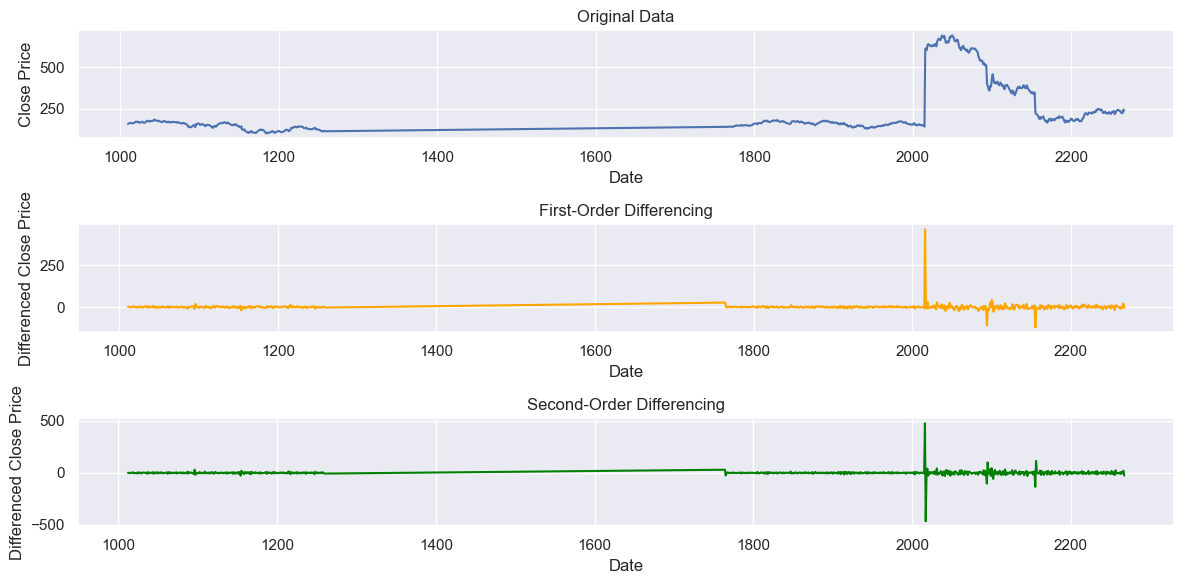

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have filtered_stock_data DataFrame with a column named 'Close'
# Perform first-order differencing
filtered_stock_data['FirstDiff'] = filtered_stock_data['Close'].diff()

# Perform second-order differencing
filtered_stock_data['SecondDiff'] = filtered_stock_data['FirstDiff'].diff()

# Plot original, first-order differenced, and second-order differenced data
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(3, 1, 1)
plt.plot(filtered_stock_data.index, filtered_stock_data['Close'])
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Close Price')

# First-order differencing
plt.subplot(3, 1, 2)
plt.plot(filtered_stock_data.index, filtered_stock_data['FirstDiff'], color='orange')
plt.title('First-Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')

# Second-order differencing
plt.subplot(3, 1, 3)
plt.plot(filtered_stock_data.index, filtered_stock_data['SecondDiff'], color='green')
plt.title('Second-Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


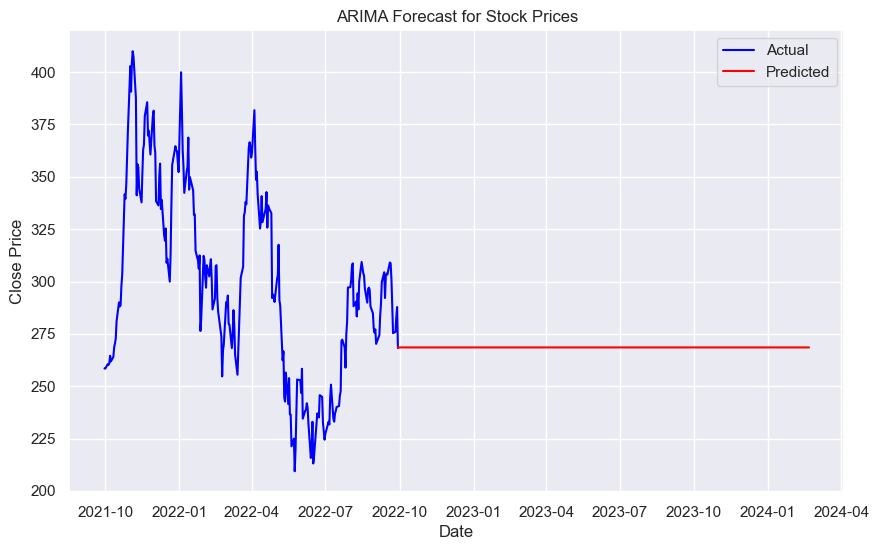

In [89]:

# Define the values of p, d, and q for ARIMA model
p = 1
d = 1
q = 1

# Ensure that the index is in datetime format
stock_yfinance_data['Date'] = pd.to_datetime(stock_yfinance_data['Date'])

# Assuming your DataFrame is named stock_yfinance_data
stock_yfinance_data.drop_duplicates(subset=['Date'], inplace=True)

# Fit the ARIMA model
model = ARIMA(stock_yfinance_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Generate forecasts for the next year
forecast_periods = 365 
forecast = arima_result.forecast(steps=forecast_periods)

# Create index for forecasted dates
last_date = stock_yfinance_data['Date'].iloc[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_periods, freq='B')

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(stock_yfinance_data['Date'], stock_yfinance_data['Close'], label='Actual', color='blue')
plt.plot(forecast_index, forecast, label='Predicted', color='red')
plt.title('ARIMA Forecast for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()





/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


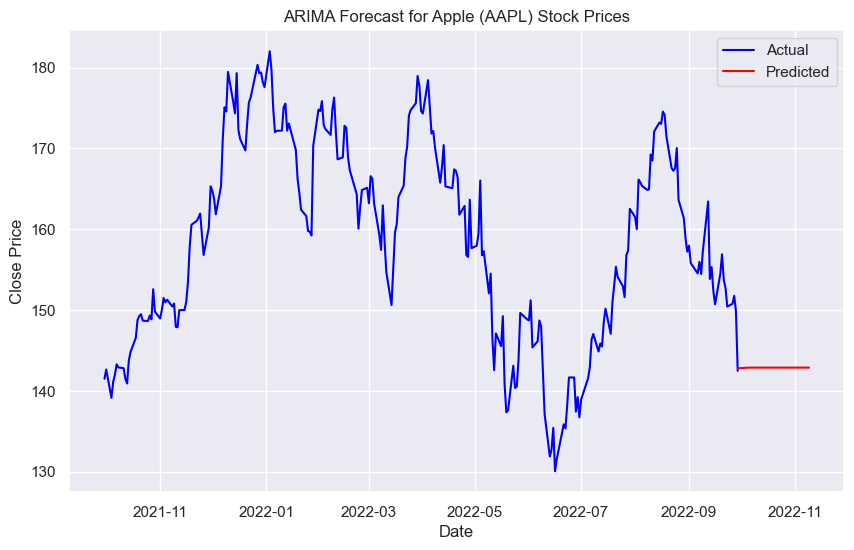

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Apple (AAPL) stock
aapl_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'AAPL']

# Drop rows with missing values
aapl_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Drop duplicate rows based on 'Date'
aapl_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
aapl_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(aapl_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index, aapl_data['Close'], label='Actual', color='blue')
plt.plot(pd.date_range(start=aapl_data.index[-1], periods=forecast_periods, freq='B'), forecast, label='Predicted', color='red')
plt.title('ARIMA Forecast for Apple (AAPL) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


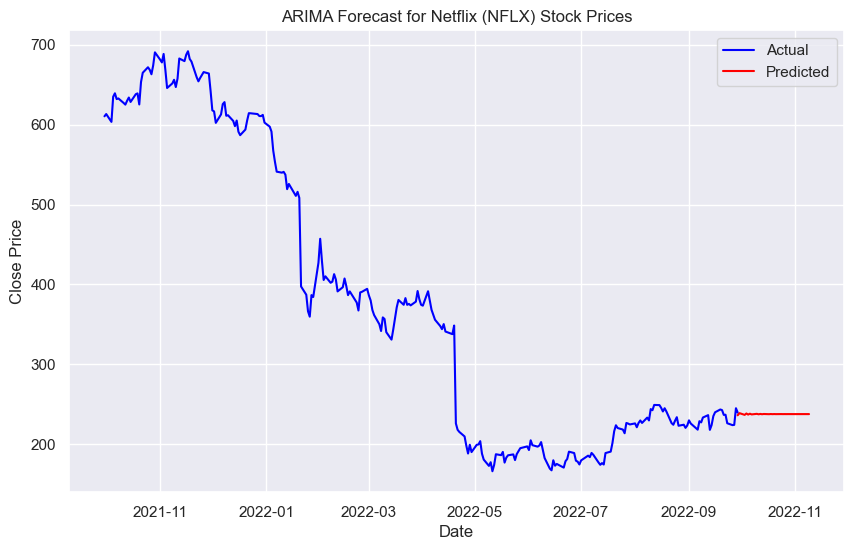

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Netflix (NFLX) stock
nflx_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'NFLX']

# Drop rows with missing values
nflx_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
nflx_data['Date'] = pd.to_datetime(nflx_data['Date'])

# Drop duplicate rows based on 'Date'
nflx_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
nflx_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(nflx_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(nflx_data.index, nflx_data['Close'], label='Actual', color='blue')
plt.plot(pd.date_range(start=nflx_data.index[-1], periods=forecast_periods, freq='B'), forecast, label='Predicted', color='red')
plt.title('ARIMA Forecast for Netflix (NFLX) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


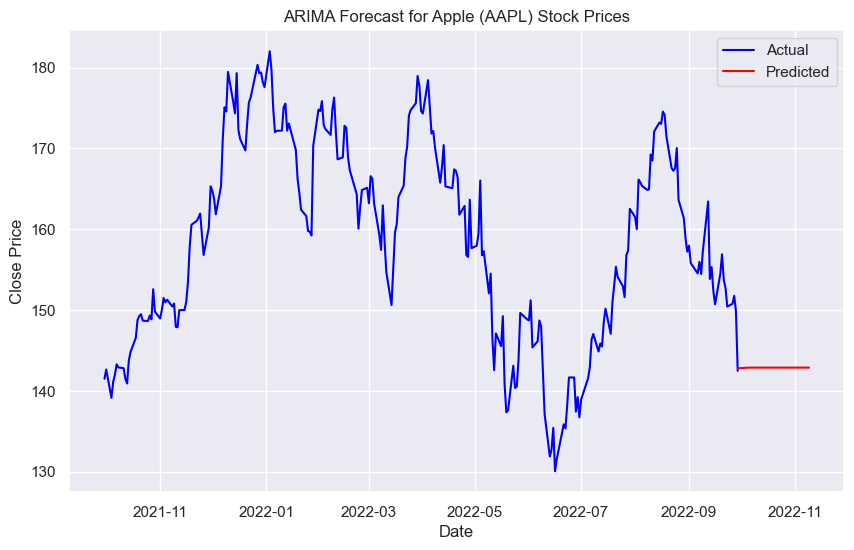

In [93]:


# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Apple (AAPL) stock
aapl_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'AAPL']

# Drop rows with missing values
aapl_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Drop duplicate rows based on 'Date'
aapl_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
aapl_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(aapl_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index, aapl_data['Close'], label='Actual', color='blue')
plt.plot(pd.date_range(start=aapl_data.index[-1], periods=forecast_periods, freq='B'), forecast, label='Predicted', color='red')
plt.title('ARIMA Forecast for Apple (AAPL) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [95]:


# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make predictions for the same period as the actual data
forecasted_values = arima_result.predict(start=aapl_data.index[0], end=aapl_data.index[-1])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(aapl_data['Close'], forecasted_values))

# Calculate MAE
mae = mean_absolute_error(aapl_data['Close'], forecasted_values)

# Calculate R-squared
r_squared = r2_score(aapl_data['Close'], forecasted_values)

# Calculate MAPE
mape = mean_absolute_percentage_error(aapl_data['Close'], forecasted_values)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)
print("Mean Absolute Percentage Error (MAPE):", mape)



Root Mean Squared Error (RMSE): 9.45364678579988
Mean Absolute Error (MAE): 2.9914652286904673
R-squared: 0.4102518932707149
Mean Absolute Percentage Error (MAPE): 1.9382833663625556


In [96]:


# Assuming you have already trained your ARIMA model and obtained the forecasted values

# Make predictions for the same period as the actual data
forecasted_values = arima_result.predict(start=amzn_data.index[0], end=amzn_data.index[-1])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(amzn_data['Close'], forecasted_values))

# Calculate MAE
mae = mean_absolute_error(amzn_data['Close'], forecasted_values)

# Calculate R-squared
r_squared = r2_score(amzn_data['Close'], forecasted_values)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(amzn_data['Close'], forecasted_values)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)
print("Mean Absolute Percentage Error (MAPE):", mape)


Root Mean Squared Error (RMSE): 26.375416070168903
Mean Absolute Error (MAE): 22.502889848000148
R-squared: -0.3124782057208664
Mean Absolute Percentage Error (MAPE): 16.852443498131205


In [97]:


# Assuming you have already trained your ARIMA model and obtained the forecasted values

# Make predictions for the same period as the actual data
forecasted_values = arima_result.predict(start=nflx_data.index[0], end=nflx_data.index[-1])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(nflx_data['Close'], forecasted_values))

# Calculate MAE
mae = mean_absolute_error(nflx_data['Close'], forecasted_values)

# Calculate R-squared
r_squared = r2_score(nflx_data['Close'], forecasted_values)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(nflx_data['Close'], forecasted_values)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)
print("Mean Absolute Percentage Error (MAPE):", mape)


Root Mean Squared Error (RMSE): 282.9484140645949
Mean Absolute Error (MAE): 219.06440425552216
R-squared: -1.4542753657010996
Mean Absolute Percentage Error (MAPE): 47.97852413099336


In [100]:


def evaluate_model_performance(data, forecasted_values):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(data['Close'], forecasted_values))

    # Calculate MAE
    mae = mean_absolute_error(data['Close'], forecasted_values)

    # Calculate R-squared
    r_squared = r2_score(data['Close'], forecasted_values)

    # Calculate MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape = mean_absolute_percentage_error(data['Close'], forecasted_values)

    return rmse, mae, r_squared, mape

# Define a function to train ARIMA model and make predictions
def train_and_predict(data):
    # Fit ARIMA model
    model = ARIMA(data['Close'], order=(p, d, q))
    result = model.fit()

    # Forecast future prices
    forecasted_values = result.forecast(steps=len(data))

    return result, forecasted_values

# List of stock names
stock_names = ['NFLX', 'AMZN', 'AAPL']

# Dictionary to store evaluation metrics for each stock
evaluation_metrics = {}

# Loop through each stock
for stock_name in stock_names:
    # Filter data for the stock
    stock_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == stock_name]
    stock_data.dropna(inplace=True)  # Drop rows with missing values
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])  # Convert date column to datetime
    stock_data.drop_duplicates(subset=['Date'], inplace=True)  # Remove duplicate dates

    # Train ARIMA model and make predictions
    arima_model, forecasted_values = train_and_predict(stock_data)

    # Evaluate model performance
    rmse, mae, r_squared, mape = evaluate_model_performance(stock_data, forecasted_values)

    # Store evaluation metrics in the dictionary
    evaluation_metrics[stock_name] = {'RMSE': rmse, 'MAE': mae, 'R-squared': r_squared, 'MAPE': mape}

# Print evaluation metrics for each stock
for stock_name, metrics in evaluation_metrics.items():
    print(f"Evaluation metrics for {stock_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignore

Evaluation metrics for NFLX:
RMSE: 228.08322401447174
MAE: 167.31210484544303
R-squared: -0.5947604131021842
MAPE: nan
Evaluation metrics for AMZN:
RMSE: 37.48674486236941
MAE: 31.297627794530243
R-squared: -1.651239262205166
MAPE: nan
Evaluation metrics for AAPL:
RMSE: 20.000419122645045
MAE: 16.799111499464594
R-squared: -1.6396479270352051
MAPE: nan


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [102]:


def evaluate_model_performance(data, forecasted_values):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(data['Close'], forecasted_values))

    # Calculate MAE
    mae = mean_absolute_error(data['Close'], forecasted_values)

    # Calculate R-squared
    r_squared = r2_score(data['Close'], forecasted_values)

    # Calculate MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape = mean_absolute_percentage_error(data['Close'], forecasted_values)

    return rmse, mae, r_squared, mape

# Define a function to train ARIMA model and make predictions
def train_and_predict(data):
    # Fit ARIMA model
    model = ARIMA(data['Close'], order=(p, d, q))
    result = model.fit()

    # Forecast future prices
    forecasted_values = result.forecast(steps=len(data))

    return result, forecasted_values

# Filtered stock data
# Filter the data for AAPL,AMZN and NFLX stocks
filtered_stock_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['AMZN', 'NFLX', 'AAPL'])]

# 1. H
#filtered_stock_data = stock_yfinance_data[stock_yfinance_data['']]

# Train ARIMA model and make predictions
arima_model, forecasted_values = train_and_predict(filtered_stock_data)

# Evaluate model performance
rmse, mae, r_squared, mape = evaluate_model_performance(filtered_stock_data, forecasted_values)

# Print evaluation metrics
print("Evaluation metrics:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")
print(f"MAPE: {mape}")


Evaluation metrics:
RMSE: 150.31187835716264
MAE: 114.13386622859306
R-squared: -0.006982717410063621
MAPE: 70.08119679434796


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
import numpy as np

# Log transformation on the 'Close' column
log_close_data = np.log(stock_yfinance_data['Close'])


In [140]:
# First-order differencing on the 'Close' column
differenced_close = stock_yfinance_data['Close'].diff().dropna()


In [122]:
import numpy as np

# Calculate z-scores for each data point
z_scores = (stock_yfinance_data['Close'] - stock_yfinance_data['Close'].mean()) / stock_yfinance_data['Close'].std()

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify outliers
outliers = stock_yfinance_data[np.abs(z_scores) > threshold]

# Print outliers
print("Outliers:")
print(outliers)


Outliers:
                                    Date        Open        High         Low  \
1970-01-01 00:00:00.000002016  9/30/2021  608.049988  619.000000  608.049988   
1970-01-01 00:00:00.000002017  10/1/2021  604.239990  614.989990  597.510010   
1970-01-01 00:00:00.000002018  10/4/2021  613.390015  626.130005  594.679993   
1970-01-01 00:00:00.000002019  10/5/2021  606.940002  640.390015  606.890015   
1970-01-01 00:00:00.000002020  10/6/2021  628.179993  639.869995  626.359985   
...                                  ...         ...         ...         ...   
1970-01-01 00:00:00.000003160  4/14/2022  591.780029  596.280029  587.049988   
1970-01-01 00:00:00.000003161  4/18/2022  585.380005  592.109985  579.599976   
1970-01-01 00:00:00.000003162  4/19/2022  583.349976  594.830017  582.000000   
1970-01-01 00:00:00.000003163  4/20/2022  599.150024  605.280029  597.299988   
1970-01-01 00:00:00.000003164  4/21/2022  607.280029  609.179993  591.150024   

                             

In [123]:
stock_yfinance_data['Close'].describe()


count    6300.000000
mean      174.657624
std       134.949601
min        11.060000
25%        78.110001
50%       145.505005
75%       225.785000
max       691.690002
Name: Close, dtype: float64

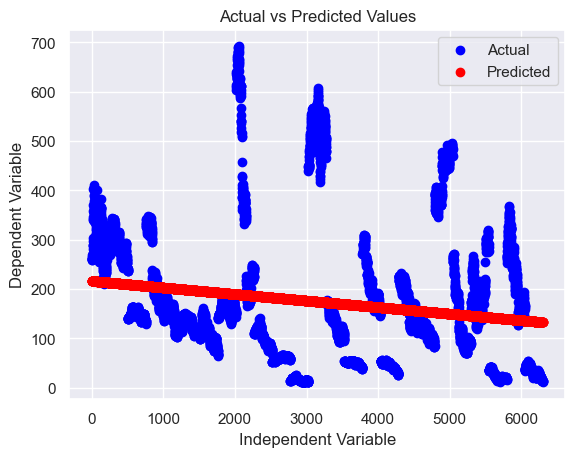

In [143]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming X contains the independent variable(s) and y contains the dependent variable
# Fit a linear regression model
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X)
results = model.fit()

# Calculate predicted values
predicted_values = results.predict(X)

# Plot actual values
plt.scatter(X[:, 1], y, color='blue', label='Actual')

# Plot predicted values
plt.scatter(X[:, 1], predicted_values, color='red', label='Predicted')

plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


# LSTM And RNN Analysis

In [144]:
import pandas as pd

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for AMZN and NFLX stocks
filtered_stock_data2 = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['AMZN', 'NFLX', 'AAPL'])]

# 1. Handling Missing Values
filtered_stock_data2.dropna(inplace=True)  # Drop rows with missing values

# 2. Data Type Conversion
filtered_stock_data2['Date'] = pd.to_datetime(filtered_stock_data2['Date'])  # Corrected line

# 3. Removing Duplicates
filtered_stock_data2.drop_duplicates(inplace=True)
 
# 4. Standardizing Column Names (if needed)
filtered_stock_data2.columns = filtered_stock_data2.columns.str.strip().str.lower().str.replace(' ', '_')

# Display the cleaned DataFrame
print(filtered_stock_data2.head())
import pandas as pd

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for AMZN and NFLX stocks
filtered_stock_data2 = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['AMZN', 'NFLX', 'AAPL'])]

# 1. Handling Missing Values
filtered_stock_data2.dropna(inplace=True)  # Drop rows with missing values

# 2. Data Type Conversion
filtered_stock_data2['Date'] = pd.to_datetime(filtered_stock_data2['Date'])  # Corrected line

# 3. Removing Duplicates
filtered_stock_data2.drop_duplicates(inplace=True)
 
# 4. Standardizing Column Names (if needed)
filtered_stock_data2.columns = filtered_stock_data2.columns.str.strip().str.lower().str.replace(' ', '_')

# Display the cleaned DataFrame
print(filtered_stock_data2.head())


           date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   

        volume stock_name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  
           date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  

In [145]:

display(filtered_stock_data2)

date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   
...         ...         ...         ...         ...         ...         ...   
2263 2022-09-23  235.139999  236.449997  221.429993  226.410004  226.410004   
2264 2022-09-26  225.600006  232.699997  223.009995  224.070007  224.070007   
2265 2022-09-27  228.630005  230.639999  220.720001  224.360001  224.360001   
2266 2022-09-28  229.690002  246.649994  227.380005  245.199997  245.199997   
2267 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   

        volume stock_name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  
...        ...        ...  
2263  11207200       NFLX  
2264   8234300       NFLX  
2265   7762200       NFLX  
2266  17579700       NFLX  
2267  18994900       NFLX  

[756 rows x 8 columns]

In [146]:
print(filtered_stock_data2.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'stock_name'],
      dtype='object')


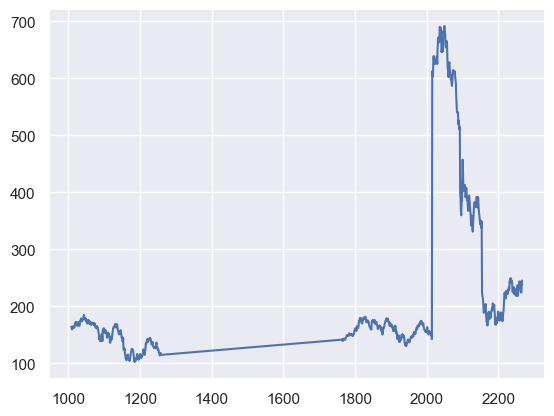

In [147]:
plt.plot(filtered_stock_data2['close'], label='Close Price')

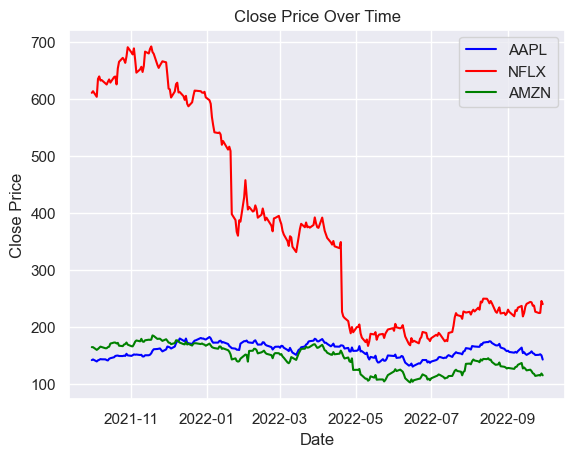

In [157]:
import matplotlib.pyplot as plt

# Convert the date column to datetime objects
filtered_stock_data2['date'] = pd.to_datetime(filtered_stock_data2['date'])

# Filter the DataFrame for each stock
aapl_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'AAPL']
nflx_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'NFLX']
amzn_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'AMZN']

# Plot the close price for each stock with different colors
plt.plot(aapl_data['date'], aapl_data['close'], label='AAPL', color='blue')
plt.plot(nflx_data['date'], nflx_data['close'], label='NFLX', color='red')
plt.plot(amzn_data['date'], amzn_data['close'], label='AMZN', color='green')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.show()



In [158]:
features = ["date", "close"]
all_data = filtered_stock_data2[features]
all_data.index = all_data.date
all_data.drop('date', axis=1, inplace=True)

In [149]:
all_data.head()
all_data.shape

(756, 1)

In [151]:
dataset = all_data.values
train = dataset[600:156,:]
test = dataset[150:,:]
     

In [159]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)

# Checking the shapes of the train and test sets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)


Train set shape: (604, 1)
Test set shape: (152, 1)


In [160]:
from sklearn.preprocessing import MinMaxScaler

# Create a new dataframe with only the 'Close' column 
dataset = all_data.filter(['close'])

# Convert the dataframe to a numpy array
dataset_values = dataset.values

# Reshape the dataset to be a 2D array with one column
dataset_values_2d = dataset_values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data with MinMaxScaler
scaled_data = scaler.fit_transform(dataset_values_2d)

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))


# Simple RNN

In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam


# Prepare the data
X = filtered_stock_data2['close'].values.reshape(-1, 1)  # Input feature
y = filtered_stock_data2['close'].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for RNN
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN model to the training data
model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test_rnn, y_test)

# Make predictions
predictions = model.predict(X_test_rnn)

# Print mean squared error
print("Mean Squared Error:", mse)


8/8 [==============================] - 0s 2ms/step
Mean Squared Error: 38988.88671875


In [162]:
# Check columns using the columns attribute
columns = filtered_stock_data2.columns
print(columns)

# Alternatively, you can use the head() method to display the first few rows of the DataFrame
print(filtered_stock_data2.head())


Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'stock_name'],
      dtype='object')
           date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   

        volume stock_name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  


In [163]:
import numpy as np

# Exclude non-numeric columns from z-score calculation
numeric_data = filtered_stock_data2.select_dtypes(include=[np.number])

# Calculate Z-score for each numerical feature
z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Define threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on Z-score
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Display outliers
print("Outliers:")
print(filtered_stock_data2[outliers.any(axis=1)])


Outliers:
           date        open        high         low       close   adj_close  \
1095 2022-02-03  141.737503  144.247498  138.332993  138.845505  138.845505   
1096 2022-02-04  155.606506  161.199997  150.608002  157.639496  157.639496   
1154 2022-04-29  129.848999  130.761002  121.625000  124.281502  124.281502   
1819 2021-12-17  169.929993  173.470001  169.690002  171.139999  170.152481   
2036 2021-10-28  670.950012  676.799988  668.030029  674.049988  674.049988   
2037 2021-10-29  673.059998  690.969971  671.239990  690.309998  690.309998   
2038 2021-11-01  689.059998  689.969971  676.539978  681.169983  681.169983   
2039 2021-11-02  683.109985  687.679993  673.820007  677.719971  677.719971   
2040 2021-11-03  677.270019  689.390015  677.270019  688.289978  688.289978   
2041 2021-11-04  685.890015  685.940002  665.500000  668.400024  668.400024   
2047 2021-11-12  660.010010  683.340027  653.820007  682.609985  682.609985   
2048 2021-11-15  681.239990  685.260010  6

In [164]:
filtered_stock_data2['date'] = pd.to_datetime(filtered_stock_data2['date'])


In [165]:
import pandas as pd

# Convert 'date' column to datetime
filtered_stock_data2['date'] = pd.to_datetime(filtered_stock_data2['date'])

# Select only numerical columns for outlier detection
numerical_columns = filtered_stock_data2.select_dtypes(include=[np.number])

# Identify outliers based on Z-score
z_scores = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Filter the DataFrame to exclude outliers
filtered_stock_data_without_outliers = filtered_stock_data2[~outliers.any(axis=1)]

# Display the cleaned DataFrame without outliers
print(filtered_stock_data_without_outliers.head())


           date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   

        volume stock_name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  


In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Assuming 'filtered_stock_data_without_outliers' contains the cleaned DataFrame without outliers
# Assuming 'Close' column contains the target variable

# Prepare the data
X = filtered_stock_data_without_outliers['close'].values.reshape(-1, 1)  # Input feature
y = filtered_stock_data_without_outliers['close'].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for RNN
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN model to the training data
model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test_rnn, y_test)

# Make predictions
predictions = model.predict(X_test_rnn)

# Print mean squared error
print("Mean Squared Error:", mse)


5/5 [==============================] - 0s 2ms/step
Mean Squared Error: 31799.759765625


In [167]:
from keras.regularizers import l2

def simple_rnn_model_with_l2(x_train, y_train, x_test, l2_penalty=0.01):
    '''
    Create a single layer RNN model with L2 regularization trained on X_train and y_train,
    and make predictions on the X_test data.
    '''
    # Import necessary libraries
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    # Define the model architecture
    model = Sequential()
    model.add(SimpleRNN(32, kernel_regularizer=l2(l2_penalty), input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1))  # Output layer with 1 neuron for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the RNN model to the training data
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model
    mse = model.evaluate(x_test, y_test)

    # Make predictions
    predictions = model.predict(x_test)

    # Print mean squared error
    print("Mean Squared Error:", mse)

    return model, predictions

# Call the function with the provided data
my_rnn_model, rnn_predictions = simple_rnn_model_with_l2(X_train_rnn, y_train, X_test_rnn)
print(rnn_predictions[1:10])  # Print some sample predictions


5/5 [==============================] - 0s 2ms/step
Mean Squared Error: 32053.1484375
[[74.523994]
 [75.08897 ]
 [74.868675]
 [74.33893 ]
 [78.65521 ]
 [74.68929 ]
 [75.16369 ]
 [73.79254 ]
 [75.06918 ]]


Mean Squared Error: 7532.528


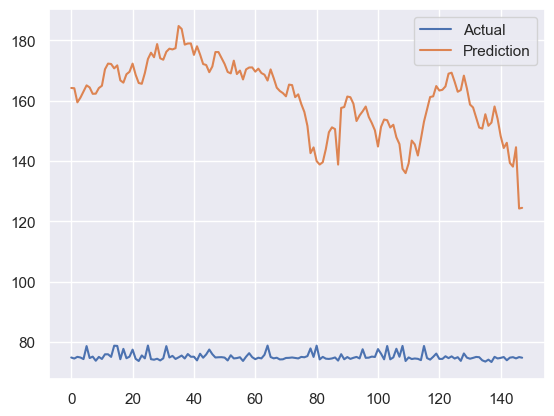

In [168]:
import numpy as np
import pandas as pd
from keras.metrics import MeanSquaredError

def actual_pred_plot(predictions, all_data):
    actual_pred = pd.DataFrame(predictions, columns=['Prediction'])
    actual_pred['Actual'] = all_data.loc['2021':, 'close'].values[:len(predictions)]  # Assuming the column name is 'Close'

    # Calculate Mean Squared Error
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Actual']), np.array(actual_pred['Prediction']))
    mse = m.result().numpy()

    # Plot actual vs. predicted
    actual_pred.plot()

    # Set legend labels
    import matplotlib.pyplot as plt
    plt.legend(['Actual', 'Prediction'])
    
    return mse, actual_pred

# Example usage:
mse, _ = actual_pred_plot(rnn_predictions, all_data)
print("Mean Squared Error:", mse)


# LSTM Analysis

Epoch 1/100
6/6 [==============================] - 3s 20ms/step - loss: 0.1030
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0180
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0147
Epoch 4/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0102
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0073
Epoch 6/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0059
Epoch 7/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0045
Epoch 8/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0046
Epoch 9/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0044
Epoch 10/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0043
Epoch 11/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0042
Epoch 12/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0040
Epoch 13/100
6/6 [==============================]

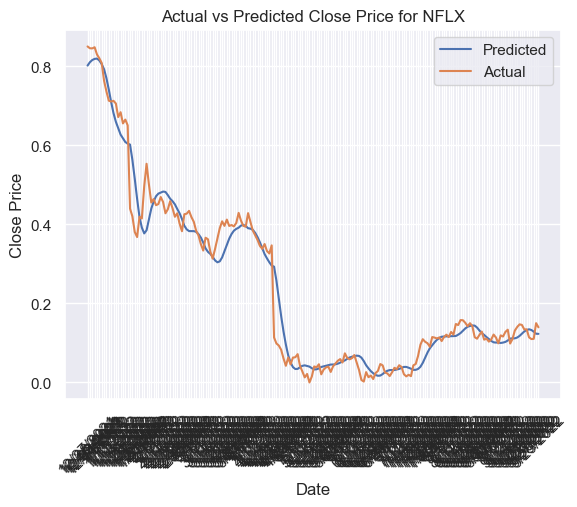

In [182]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Netflix (NFLX) stock
nflx_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'NFLX']

# Extract the 'close' column and 'date' column
close_data = nflx_data['Close'].values.reshape(-1, 1)
date_data = nflx_data['Date']

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted with date axis
plt.plot(date_data[look_back:], predictions, label='Predicted')
plt.plot(date_data[look_back:], y, label='Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price for NFLX')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import numpy as np

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Preprocessing steps
# Exclude non-numeric columns (e.g., date column)
numeric_features = stock_yfinance_data.select_dtypes(include=[np.number]).columns
stock_yfinance_data_numeric = stock_yfinance_data[numeric_features]

# Fill missing values
imputer = SimpleImputer(strategy='mean')
stock_yfinance_data_filled = imputer.fit_transform(stock_yfinance_data_numeric)

# Apply Min-Max scaling
scaler = MinMaxScaler()
stock_yfinance_data_scaled = scaler.fit_transform(stock_yfinance_data_filled)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(stock_yfinance_data_scaled) - look_back):
    X.append(stock_yfinance_data_scaled[i:i+look_back])
    y.append(stock_yfinance_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
195/195 [==============================] - 7s 22ms/step - loss: 0.0135
Epoch 2/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0124
Epoch 3/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0123
Epoch 4/100
195/195 [==============================] - 5s 26ms/step - loss: 0.0121
Epoch 5/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0121
Epoch 6/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0120
Epoch 7/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0120
Epoch 8/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
Epoch 9/100
195/195 [==============================] - 5s 25ms/step - loss: 0.0119
Epoch 10/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
Epoch 11/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0119
Epoch 12/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
E

Epoch 1/100
6/6 [==============================] - 2s 27ms/step - loss: 0.0747
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0162
Epoch 3/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0084
Epoch 4/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0090
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0052
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0052
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0043
Epoch 8/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0044
Epoch 9/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0041
Epoch 10/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0040
Epoch 11/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0039
Epoch 12/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0038
Epoch 13/100
6/6 [==============================]

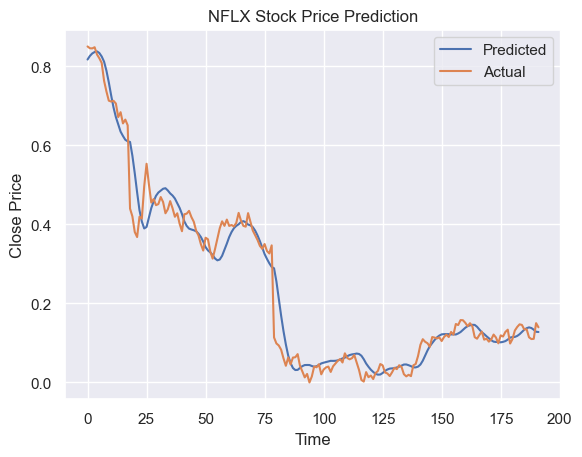

In [185]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Netflix (NFLX) stock
nflx_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'NFLX']

# Extract the 'close' column
close_data = nflx_data['Close'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted
plt.plot(predictions, label='Predicted')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('NFLX Stock Price Prediction')
plt.legend()
plt.show()


In [172]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Drop non-numeric columns or select only numeric columns
numeric_data = stock_yfinance_data.select_dtypes(include=np.number)

# Fill missing values using a forward fill (or any other appropriate strategy)
numeric_data_filled = numeric_data.fillna(method='ffill')

# Apply Min-Max scaling
scaler = MinMaxScaler()
stock_yfinance_data_scaled = scaler.fit_transform(numeric_data_filled)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(stock_yfinance_data_scaled) - look_back):
    X.append(stock_yfinance_data_scaled[i:i+look_back])
    y.append(stock_yfinance_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
195/195 [==============================] - 7s 21ms/step - loss: 0.0142
Epoch 2/100
195/195 [==============================] - 4s 21ms/step - loss: 0.0123
Epoch 3/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0122
Epoch 4/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0121
Epoch 5/100
195/195 [==============================] - 5s 26ms/step - loss: 0.0120
Epoch 6/100
195/195 [==============================] - 5s 25ms/step - loss: 0.0120
Epoch 7/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0120
Epoch 8/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0119
Epoch 9/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0119
Epoch 10/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0119
Epoch 11/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
Epoch 12/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
E

Epoch 1/100
195/195 [==============================] - 6s 20ms/step - loss: 0.0138
Epoch 2/100
195/195 [==============================] - 4s 22ms/step - loss: 0.0124
Epoch 3/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0122
Epoch 4/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0121
Epoch 5/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0120
Epoch 6/100
195/195 [==============================] - 4s 22ms/step - loss: 0.0120
Epoch 7/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
Epoch 8/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0119
Epoch 9/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
Epoch 10/100
195/195 [==============================] - 5s 23ms/step - loss: 0.0119
Epoch 11/100
195/195 [==============================] - 4s 22ms/step - loss: 0.0119
Epoch 12/100
195/195 [==============================] - 5s 24ms/step - loss: 0.0119
E

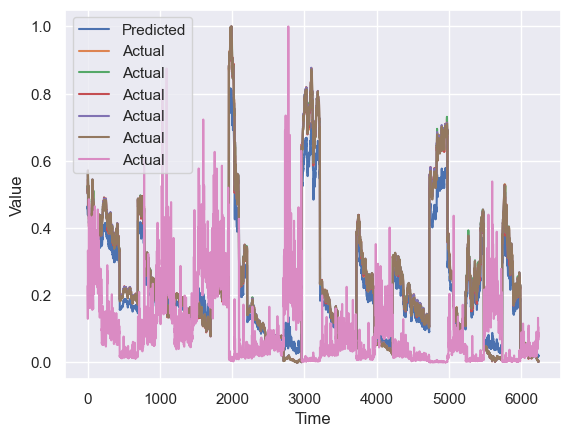

In [173]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Drop non-numeric columns or select only numeric columns
numeric_data = stock_yfinance_data.select_dtypes(include=np.number)

# Fill missing values using a forward fill (or any other appropriate strategy)
numeric_data_filled = numeric_data.fillna(method='ffill')

# Apply Min-Max scaling
scaler = MinMaxScaler()
stock_yfinance_data_scaled = scaler.fit_transform(numeric_data_filled)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(stock_yfinance_data_scaled) - look_back):
    X.append(stock_yfinance_data_scaled[i:i+look_back])
    y.append(stock_yfinance_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted
plt.plot(predictions, label='Predicted')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/100
195/195 [==============================] - 6s 21ms/step - loss: 0.0040
Epoch 2/100
195/195 [==============================] - 4s 20ms/step - loss: 0.0013
Epoch 3/100
195/195 [==============================] - 4s 23ms/step - loss: 0.0010
Epoch 4/100
195/195 [==============================] - 4s 22ms/step - loss: 9.3723e-04
Epoch 5/100
195/195 [==============================] - 5s 23ms/step - loss: 7.6446e-04
Epoch 6/100
195/195 [==============================] - 5s 23ms/step - loss: 6.9018e-04
Epoch 7/100
195/195 [==============================] - 5s 24ms/step - loss: 6.3719e-04
Epoch 8/100
195/195 [==============================] - 4s 22ms/step - loss: 5.6643e-04
Epoch 9/100
195/195 [==============================] - 4s 23ms/step - loss: 5.5220e-04
Epoch 10/100
195/195 [==============================] - 5s 24ms/step - loss: 5.0100e-04
Epoch 11/100
195/195 [==============================] - 4s 22ms/step - loss: 4.7449e-04
Epoch 12/100
195/195 [==============================]

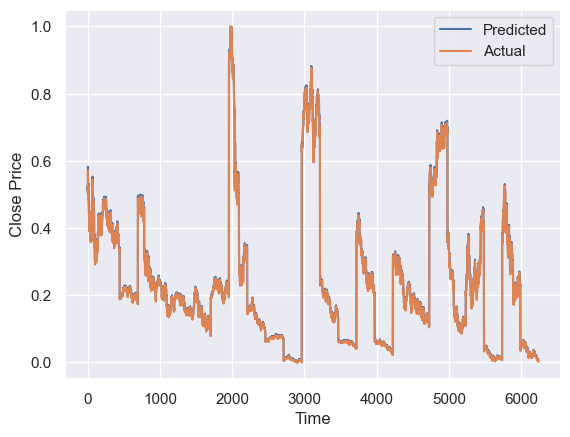

In [174]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Extract the 'close' column
close_data = stock_yfinance_data['Close'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted
plt.plot(predictions, label='Predicted')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Epoch 1/100
22/22 [==============================] - 4s 31ms/step - loss: 0.0221
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0080
Epoch 3/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0055
Epoch 4/100
22/22 [==============================] - 1s 28ms/step - loss: 0.0047
Epoch 5/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0042
Epoch 6/100
22/22 [==============================] - 1s 29ms/step - loss: 0.0041
Epoch 7/100
22/22 [==============================] - 1s 35ms/step - loss: 0.0041
Epoch 8/100
22/22 [==============================] - 1s 35ms/step - loss: 0.0040
Epoch 9/100
22/22 [==============================] - 1s 34ms/step - loss: 0.0035
Epoch 10/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0034
Epoch 11/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0032
Epoch 12/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0031
Epoch 13/100
22/22 [=====

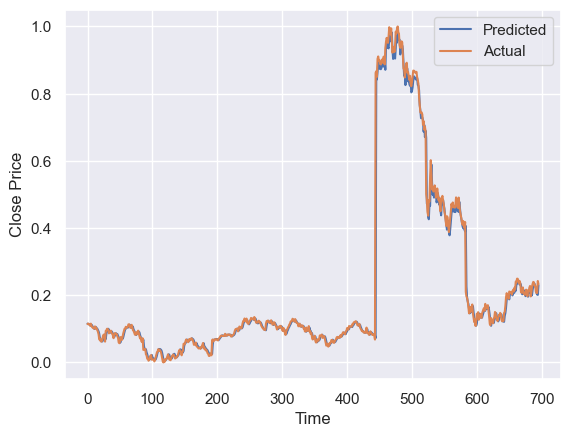

In [175]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for the specified stock names
filtered_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(["AAPL", "NFLX", "AMZN"])]

# Extract the 'close' column
close_data = filtered_data['Close'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted
plt.plot(predictions, label='Predicted')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Epoch 1/100
6/6 [==============================] - 2s 22ms/step - loss: 0.0426
Epoch 2/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0140
Epoch 3/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0078
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0063
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0048
Epoch 6/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0043
Epoch 7/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0042
Epoch 8/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0039
Epoch 9/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0038
Epoch 10/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0037
Epoch 11/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0036
Epoch 12/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 13/100
6/6 [==============================]

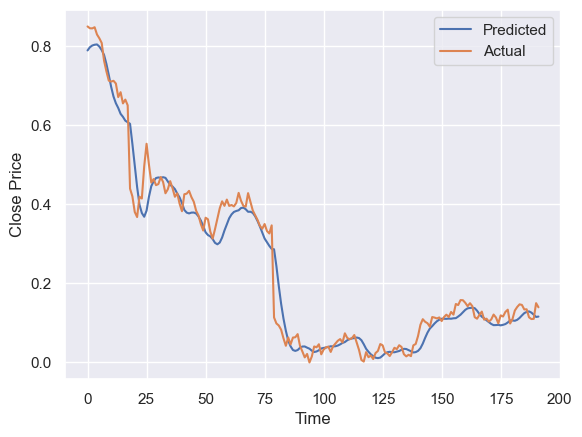

In [180]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the stock data from CSV or any other source
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Netflix (NFLX) stock
nflx_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'NFLX']

# Extract the 'close' column
close_data = nflx_data['Close'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Reshape the data for LSTM
# Assuming you want to predict the next value based on the last 60 days
look_back = 60
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted
plt.plot(predictions, label='Predicted')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [176]:
print(stock_yfinance_data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name'],
      dtype='object')


In [177]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.0011571973970820866
Root Mean Squared Error: 0.034017604223138445


In [178]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y, predictions)

print("R-squared score:", r2)


R-squared score: 0.9833063231004455


In [179]:
print(filtered_data.head())


           Date        Open        High         Low       Close   Adj Close  \
1008  9/30/2021  165.800003  166.392502  163.699493  164.251999  164.251999   
1009  10/1/2021  164.450501  165.458496  162.796997  164.162994  164.162994   
1010  10/4/2021  163.969498  163.999496  158.812500  159.488998  159.488998   
1011  10/5/2021  160.225006  163.036499  160.123001  161.050003  161.050003   
1012  10/6/2021  160.676498  163.216995  159.931000  163.100494  163.100494   

        Volume Stock Name  
1008  56848000       AMZN  
1009  56712000       AMZN  
1010  90462000       AMZN  
1011  65384000       AMZN  
1012  50660000       AMZN  


In [187]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming filtered_stock_data2 is your DataFrame containing the filtered stock data

# Convert the 'date' column to datetime
filtered_stock_data2['date'] = pd.to_datetime(filtered_stock_data2['date'])

# Sort the DataFrame by date
filtered_stock_data2.sort_values(by='date', inplace=True)

# Extract the 'close' column
close_data = filtered_stock_data2['close'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Define lookback window
look_back = 60

# Create sequences for input data
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
22/22 [==============================] - 3s 25ms/step - loss: 0.0515
Epoch 2/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0447
Epoch 3/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0444
Epoch 4/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0437
Epoch 5/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0450
Epoch 6/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0447
Epoch 7/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0435
Epoch 8/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0436
Epoch 9/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0435
Epoch 10/100
22/22 [==============================] - 1s 24ms/step - loss: 0.0428
Epoch 11/100
22/22 [==============================] - 1s 26ms/step - loss: 0.0410
Epoch 12/100
22/22 [==============================] - 1s 25ms/step - loss: 0.0400
Epoch 13/100
22/22 [=====

In [267]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming filtered_stock_data2 is your DataFrame containing the filtered stock data

# Convert the 'date' column to datetime
filtered_stock_data2['date'] = pd.to_datetime(filtered_stock_data2['date'])

# Sort the DataFrame by date
filtered_stock_data2.sort_values(by='date', inplace=True)

# Extract the 'close' column
close_data = filtered_stock_data2['close'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Define lookback window
look_back = 60

# Create sequences for input data
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Reshape input data to be 3D [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=200, batch_size=32, verbose=1)



Epoch 1/200
22/22 [==============================] - 4s 27ms/step - loss: 0.0495
Epoch 2/200
22/22 [==============================] - 1s 25ms/step - loss: 0.0456
Epoch 3/200
22/22 [==============================] - 1s 25ms/step - loss: 0.0439
Epoch 4/200
22/22 [==============================] - 1s 25ms/step - loss: 0.0439
Epoch 5/200
22/22 [==============================] - 1s 25ms/step - loss: 0.0439
Epoch 6/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0425
Epoch 7/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0423
Epoch 8/200
22/22 [==============================] - 1s 27ms/step - loss: 0.0400
Epoch 9/200
22/22 [==============================] - 1s 28ms/step - loss: 0.0389
Epoch 10/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0378
Epoch 11/200
22/22 [==============================] - 1s 28ms/step - loss: 0.0370
Epoch 12/200
22/22 [==============================] - 1s 30ms/step - loss: 0.0344
Epoch 13/200
22/22 [=====

22/22 [==============================] - 1s 28ms/step - loss: 0.0294
Epoch 102/200
22/22 [==============================] - 1s 28ms/step - loss: 0.0289
Epoch 103/200
22/22 [==============================] - 1s 28ms/step - loss: 0.0297
Epoch 104/200
22/22 [==============================] - 1s 28ms/step - loss: 0.0293
Epoch 105/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0292
Epoch 106/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0289
Epoch 107/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0291
Epoch 108/200
22/22 [==============================] - 1s 35ms/step - loss: 0.0298
Epoch 109/200
22/22 [==============================] - 1s 33ms/step - loss: 0.0287
Epoch 110/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0291
Epoch 111/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0293
Epoch 112/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0296
Epoch 113/200
22/2

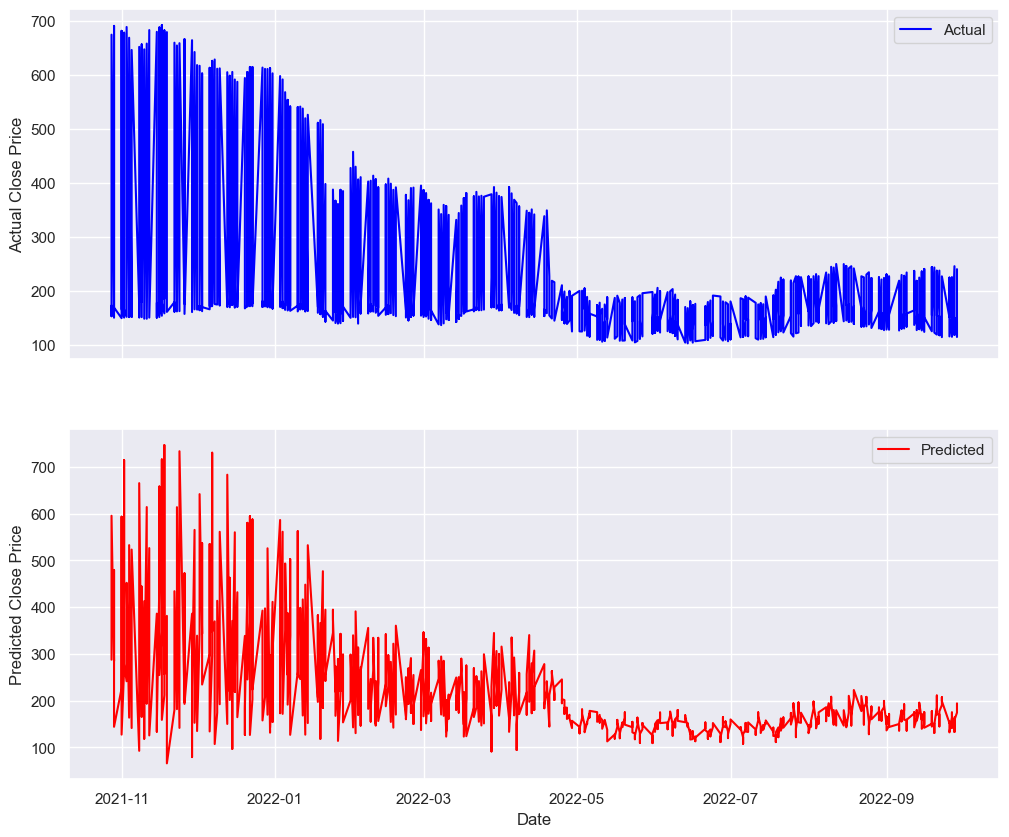

In [189]:
# Plot actual and predicted on separate subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot actual data
axs[0].plot(filtered_stock_data2['date'].iloc[look_back:], actual_values, label='Actual', color='blue')
axs[0].set_ylabel('Actual Close Price')
axs[0].legend()

# Plot predicted data
axs[1].plot(filtered_stock_data2['date'].iloc[look_back:], predictions, label='Predicted', color='red')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Predicted Close Price')
axs[1].legend()

plt.show()


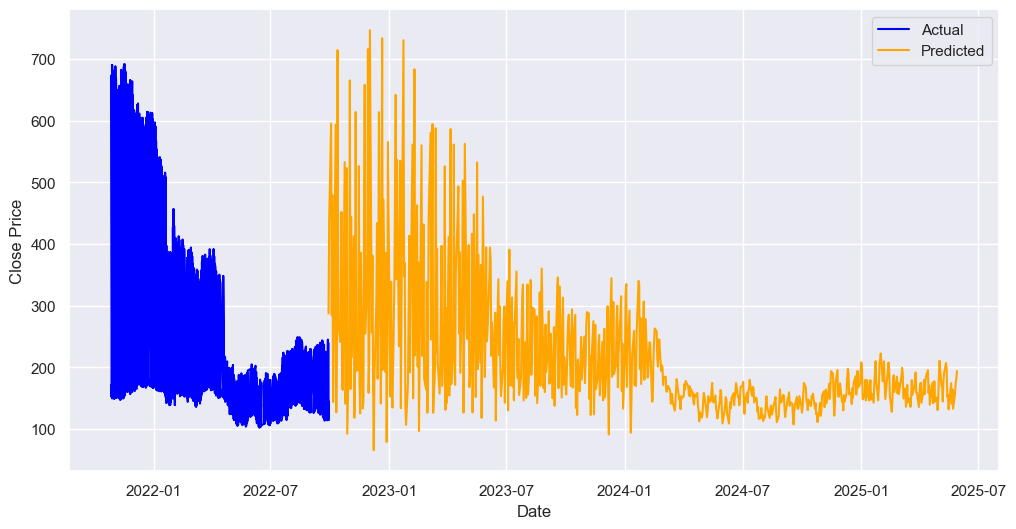

In [194]:
import matplotlib.pyplot as plt

# Get the dates for the x-axis
dates_actual = filtered_stock_data2['date'].iloc[look_back:]
dates_predicted = pd.date_range(start=dates_actual.iloc[-1], periods=len(predictions), freq='B')

# Plot actual and predicted separately
plt.figure(figsize=(12, 6))
plt.plot(dates_actual, actual_values_reshaped, label='Actual', color='blue')
plt.plot(dates_predicted, predictions_reshaped, label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()





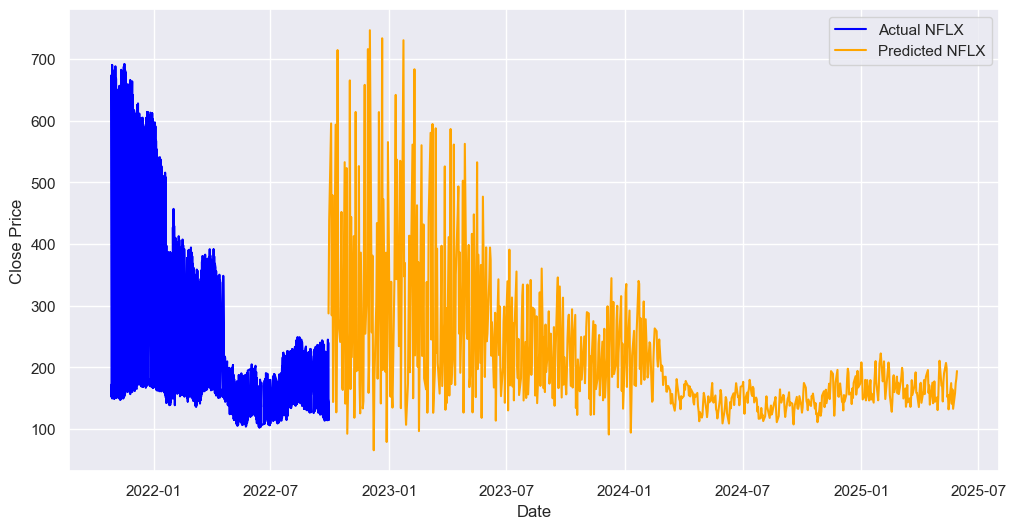

In [197]:
import matplotlib.pyplot as plt

# Get the dates for the x-axis
dates_actual = filtered_stock_data2['date'].iloc[look_back:]
dates_predicted = pd.date_range(start=dates_actual.iloc[-1], periods=len(predictions), freq='B')

# Plot actual and predicted separately
plt.figure(figsize=(12, 6))
plt.plot(dates_actual, actual_values_reshaped, label='Actual NFLX', color='blue')
plt.plot(dates_predicted, predictions_reshaped, label='Predicted NFLX', color='orange')

# You can add similar lines for AMZN and AAPL if needed

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [204]:
print(filtered_stock_data2.head)

<bound method NDFrame.head of            date        open        high         low       close   adj_close  \
1008 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1764 2021-09-30  143.660004  144.380005  141.279999  141.500000  140.478485   
2016 2021-09-30  608.049988  619.000000  608.049988  610.340027  610.340027   
1009 2021-10-01  164.450501  165.458496  162.796997  164.162994  164.162994   
1765 2021-10-01  141.899994  142.919998  139.110001  142.649994  141.620163   
...         ...         ...         ...         ...         ...         ...   
1258 2022-09-28  114.379997  118.699997  113.800003  118.010002  118.010002   
2014 2022-09-28  147.639999  150.639999  144.839996  149.839996  149.591843   
2015 2022-09-29  146.100006  146.720001  140.679993  142.479996  142.244034   
1259 2022-09-29  115.599998  116.070000  113.059998  114.800003  114.800003   
2267 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   

         volume stock

6/6 [==============================] - 0s 13ms/step


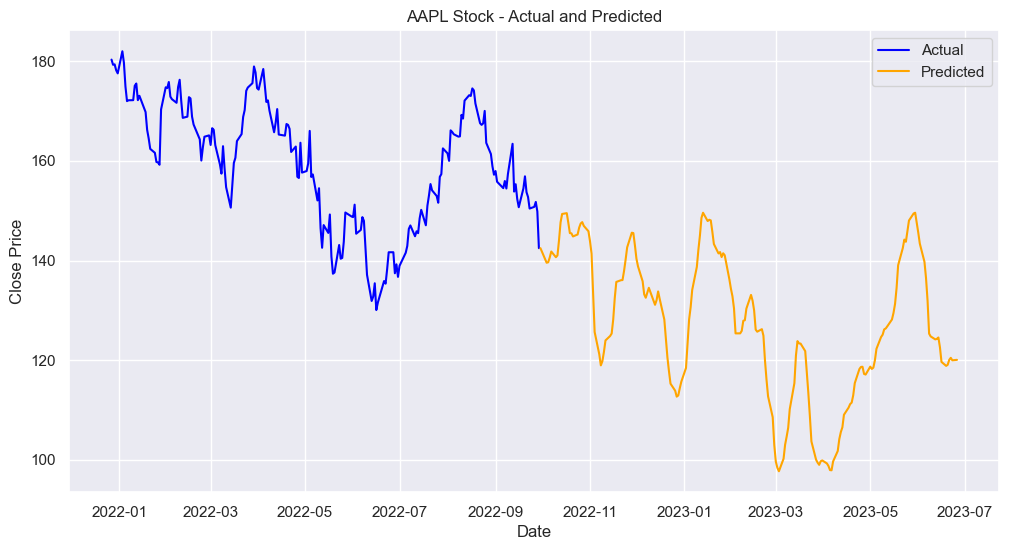

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for AAPL
aapl_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'AAPL']

# Prepare the data for prediction
# Extract the 'close' column
close_data_aapl = aapl_data['close'].values.reshape(-1, 1)

# Apply Min-Max scaling using the same scaler as before
close_data_scaled_aapl = scaler.transform(close_data_aapl)

# Create sequences for input data
X_aapl = []

for i in range(len(close_data_scaled_aapl) - look_back):
    X_aapl.append(close_data_scaled_aapl[i:i+look_back])

X_aapl = np.array(X_aapl)

# Reshape input data to be 3D [samples, timesteps, features]
X_aapl = np.reshape(X_aapl, (X_aapl.shape[0], X_aapl.shape[1], 1))

# Make predictions
predictions_aapl_scaled = model.predict(X_aapl)

# Inverse transform the scaled predictions
predictions_aapl = scaler.inverse_transform(predictions_aapl_scaled)

# Get the dates for the x-axis
dates_actual = aapl_data['date'].iloc[look_back:]
last_actual_date = dates_actual.iloc[-1]
dates_predicted = pd.date_range(start='2022-09-30', periods=len(predictions_aapl), freq='B')

# Determine the vertical point where blue line ends and orange line starts
ending_point_blue = aapl_data['close'].iloc[look_back:].values[-1]

# Plot the actual stock prices (blue line) up to 2022-09
plt.figure(figsize=(12, 6))
plt.plot(dates_actual, aapl_data['close'].iloc[look_back:], label='Actual', color='blue')

# Plot the predicted stock prices (orange line) starting from 2022-09-30
plt.plot(dates_predicted, predictions_aapl + (ending_point_blue - predictions_aapl[0]), label='Predicted', color='orange')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Stock - Actual and Predicted')
plt.legend()
plt.show()




6/6 [==============================] - 0s 9ms/step


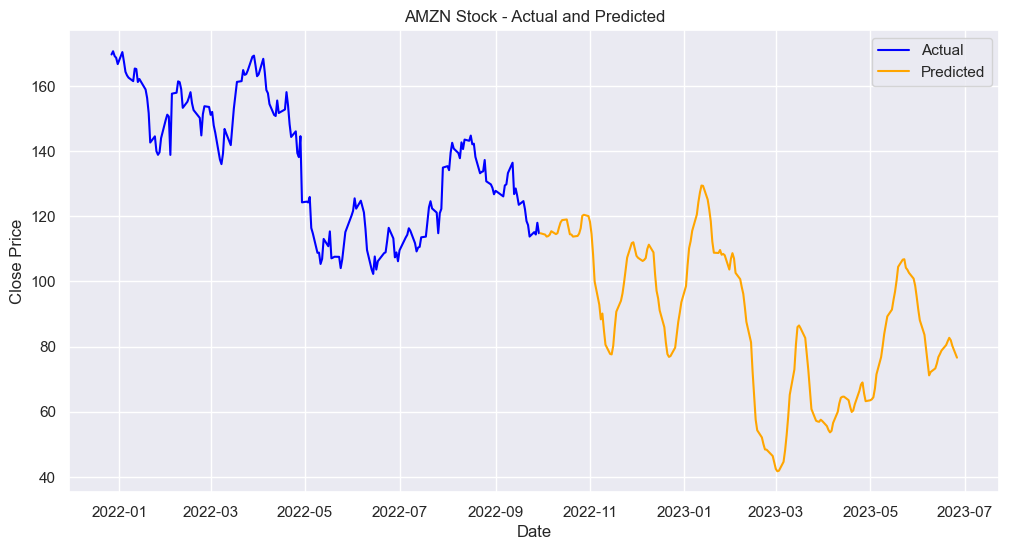

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for AMZN
amzn_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'AMZN']

# Prepare the data for prediction
# Extract the 'close' column
close_data_amzn = amzn_data['close'].values.reshape(-1, 1)

# Apply Min-Max scaling using the same scaler as before
close_data_scaled_amzn = scaler.transform(close_data_amzn)

# Create sequences for input data
X_amzn = []

for i in range(len(close_data_scaled_amzn) - look_back):
    X_amzn.append(close_data_scaled_amzn[i:i+look_back])

X_amzn = np.array(X_amzn)

# Reshape input data to be 3D [samples, timesteps, features]
X_amzn = np.reshape(X_amzn, (X_amzn.shape[0], X_amzn.shape[1], 1))

# Make predictions
predictions_amzn_scaled = model.predict(X_amzn)

# Inverse transform the scaled predictions
predictions_amzn = scaler.inverse_transform(predictions_amzn_scaled)

# Get the dates for the x-axis
dates_actual_amzn = amzn_data['date'].iloc[look_back:]
last_actual_date_amzn = dates_actual_amzn.iloc[-1]
dates_predicted_amzn = pd.date_range(start='2022-09-30', periods=len(predictions_amzn), freq='B')

# Determine the vertical point where blue line ends and orange line starts
ending_point_blue_amzn = amzn_data['close'].iloc[look_back:].values[-1]

# Plot the actual stock prices (blue line) up to 2022-09
plt.figure(figsize=(12, 6))
plt.plot(dates_actual_amzn, amzn_data['close'].iloc[look_back:], label='Actual', color='blue')

# Plot the predicted stock prices (orange line) starting from 2022-09-30
plt.plot(dates_predicted_amzn, predictions_amzn + (ending_point_blue_amzn - predictions_amzn[0]), label='Predicted', color='orange')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AMZN Stock - Actual and Predicted')
plt.legend()
plt.show()


6/6 [==============================] - 0s 10ms/step


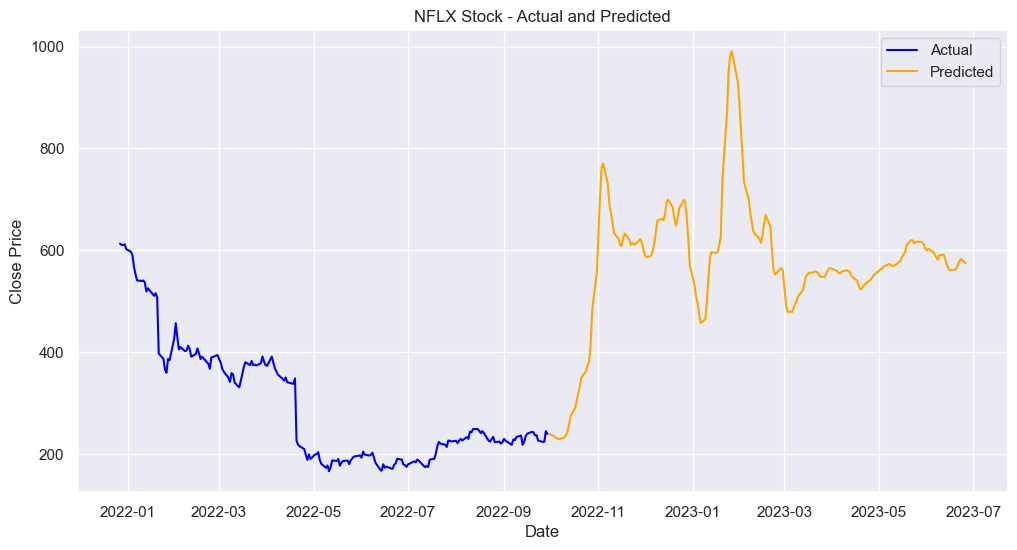

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for NFLX
nflx_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'NFLX']

# Prepare the data for prediction
# Extract the 'close' column
close_data_nflx = nflx_data['close'].values.reshape(-1, 1)

# Apply Min-Max scaling using the same scaler as before
close_data_scaled_nflx = scaler.transform(close_data_nflx)

# Create sequences for input data
X_nflx = []

for i in range(len(close_data_scaled_nflx) - look_back):
    X_nflx.append(close_data_scaled_nflx[i:i+look_back])

X_nflx = np.array(X_nflx)

# Reshape input data to be 3D [samples, timesteps, features]
X_nflx = np.reshape(X_nflx, (X_nflx.shape[0], X_nflx.shape[1], 1))

# Make predictions
predictions_nflx_scaled = model.predict(X_nflx)

# Inverse transform the scaled predictions
predictions_nflx = scaler.inverse_transform(predictions_nflx_scaled)

# Get the dates for the x-axis
dates_actual_nflx = nflx_data['date'].iloc[look_back:]
last_actual_date_nflx = dates_actual_nflx.iloc[-1]
dates_predicted_nflx = pd.date_range(start='2022-09-30', periods=len(predictions_nflx), freq='B')

# Determine the vertical point where blue line ends and orange line starts
ending_point_blue_nflx = nflx_data['close'].iloc[look_back:].values[-1]

# Plot the actual stock prices (blue line) up to 2022-09
plt.figure(figsize=(12, 6))
plt.plot(dates_actual_nflx, nflx_data['close'].iloc[look_back:], label='Actual', color='blue')

# Plot the predicted stock prices (orange line) starting from 2022-09-30
plt.plot(dates_predicted_nflx, predictions_nflx + (ending_point_blue_nflx - predictions_nflx[0]), label='Predicted', color='orange')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NFLX Stock - Actual and Predicted')
plt.legend()
plt.show()


In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the AAPL data
predictions_aapl_scaled = model.predict(X_aapl)

# Inverse transform the scaled predictions
predictions_aapl = scaler.inverse_transform(predictions_aapl_scaled)

# Compute evaluation metrics
mae = mean_absolute_error(aapl_data['close'].iloc[look_back:], predictions_aapl)
mse = mean_squared_error(aapl_data['close'].iloc[look_back:], predictions_aapl)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


6/6 [==============================] - 0s 10ms/step
Mean Absolute Error (MAE): 11.574143807560219
Mean Squared Error (MSE): 195.66816988069561
Root Mean Squared Error (RMSE): 13.988143904060166


In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the AMZN data
predictions_amzn_scaled = model.predict(X_amzn)

# Inverse transform the scaled predictions
predictions_amzn = scaler.inverse_transform(predictions_amzn_scaled)

# Compute evaluation metrics
mae_amzn = mean_absolute_error(amzn_data['close'].iloc[look_back:], predictions_amzn)
mse_amzn = mean_squared_error(amzn_data['close'].iloc[look_back:], predictions_amzn)
rmse_amzn = np.sqrt(mse_amzn)

print("Mean Absolute Error (MAE) for AMZN:", mae_amzn)
print("Mean Squared Error (MSE) for AMZN:", mse_amzn)
print("Root Mean Squared Error (RMSE) for AMZN:", rmse_amzn)


6/6 [==============================] - 0s 8ms/step
Mean Absolute Error (MAE) for AMZN: 14.854368889073692
Mean Squared Error (MSE) for AMZN: 332.2408096598603
Root Mean Squared Error (RMSE) for AMZN: 18.227474033992213


In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter the data for NFLX
nflx_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'NFLX']

# Prepare the data for prediction
close_data_nflx = nflx_data['close'].values.reshape(-1, 1)
close_data_scaled_nflx = scaler.transform(close_data_nflx)

# Create sequences for input data
X_nflx = []
for i in range(len(close_data_scaled_nflx) - look_back):
    X_nflx.append(close_data_scaled_nflx[i:i+look_back])

X_nflx = np.array(X_nflx)
X_nflx = np.reshape(X_nflx, (X_nflx.shape[0], X_nflx.shape[1], 1))

# Make predictions
predictions_nflx_scaled = model.predict(X_nflx)
predictions_nflx = scaler.inverse_transform(predictions_nflx_scaled)

# Compute evaluation metrics
mae_nflx = mean_absolute_error(nflx_data['close'].iloc[look_back:], predictions_nflx)
mse_nflx = mean_squared_error(nflx_data['close'].iloc[look_back:], predictions_nflx)
rmse_nflx = np.sqrt(mse_nflx)

print("Mean Absolute Error (MAE) for NFLX:", mae_nflx)
print("Mean Squared Error (MSE) for NFLX:", mse_nflx)
print("Root Mean Squared Error (RMSE) for NFLX:", rmse_nflx)


6/6 [==============================] - 0s 9ms/step
Mean Absolute Error (MAE) for NFLX: 145.7770224915556
Mean Squared Error (MSE) for NFLX: 57524.79673218198
Root Mean Squared Error (RMSE) for NFLX: 239.84327535326477


In [247]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the filtered_stock_data2
predictions_filtered_scaled = model.predict(X_filtered)

# Inverse transform the scaled predictions
predictions_filtered = scaler.inverse_transform(predictions_filtered_scaled)

# Compute evaluation metrics
mae_filtered = mean_absolute_error(filtered_stock_data2['close'].iloc[look_back:], predictions_filtered)
mse_filtered = mean_squared_error(filtered_stock_data2['close'].iloc[look_back:], predictions_filtered)
rmse_filtered = np.sqrt(mse_filtered)

print("Mean Absolute Error (MAE) for filtered_stock_data2:", mae_filtered)
print("Mean Squared Error (MSE) for filtered_stock_data2:", mse_filtered)
print("Root Mean Squared Error (RMSE) for filtered_stock_data2:", rmse_filtered)


22/22 [==============================] - 0s 9ms/step
Mean Absolute Error (MAE) for filtered_stock_data2: 54.207266971506954
Mean Squared Error (MSE) for filtered_stock_data2: 6043.460067117365
Root Mean Squared Error (RMSE) for filtered_stock_data2: 77.73969428237652


In [ ]:
##For 200 Epochs

In [269]:
# Assuming filtered_stock_data2 is your DataFrame containing the features and target variable

# Drop datetime columns
filtered_stock_data2_numeric = filtered_stock_data2.select_dtypes(include=[np.number])

# Splitting the data into features (X) and target variable (y)
X = filtered_stock_data2_numeric.drop(columns=['close'])  # Assuming 'close' is the target variable
y = filtered_stock_data2_numeric['close']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Defining and training the LSTM model
# (continue with defining and training the model as in the previous code example)


In [246]:
# Assuming filtered_stock_data2 is your DataFrame containing the filtered stock data

# Prepare the data for prediction
# Extract the 'close' column
close_data_filtered = filtered_stock_data2['close'].values.reshape(-1, 1)

# Apply Min-Max scaling using the same scaler as before
close_data_scaled_filtered = scaler.transform(close_data_filtered)

# Create sequences for input data
X_filtered = []

for i in range(len(close_data_scaled_filtered) - look_back):
    X_filtered.append(close_data_scaled_filtered[i:i+look_back])

X_filtered = np.array(X_filtered)

# Reshape input data to be 3D [samples, timesteps, features]
X_filtered = np.reshape(X_filtered, (X_filtered.shape[0], X_filtered.shape[1], 1))


In [270]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming filtered_stock_data2 is your DataFrame containing the filtered stock data

# Convert the 'date' column to datetime
filtered_stock_data2['date'] = pd.to_datetime(filtered_stock_data2['date'])

# Sort the DataFrame by date
filtered_stock_data2.sort_values(by='date', inplace=True)

# Extract the 'close' column
close_data = filtered_stock_data2['close'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
close_data_scaled = scaler.fit_transform(close_data)

# Define lookback window
look_back = 60

# Create sequences for input data
X, y = [], []

for i in range(len(close_data_scaled) - look_back):
    X.append(close_data_scaled[i:i+look_back])
    y.append(close_data_scaled[i+look_back])

X, y = np.array(X), np.array(y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Inverse transform the predictions and actual values to the original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Epoch 1/200
18/18 [==============================] - 3s 26ms/step - loss: 0.0525
Epoch 2/200
18/18 [==============================] - 0s 24ms/step - loss: 0.0468
Epoch 3/200
18/18 [==============================] - 0s 25ms/step - loss: 0.0444
Epoch 4/200
18/18 [==============================] - 0s 24ms/step - loss: 0.0428
Epoch 5/200
18/18 [==============================] - 0s 24ms/step - loss: 0.0431
Epoch 6/200
18/18 [==============================] - 0s 24ms/step - loss: 0.0427
Epoch 7/200
18/18 [==============================] - 0s 27ms/step - loss: 0.0418
Epoch 8/200
18/18 [==============================] - 1s 29ms/step - loss: 0.0430
Epoch 9/200
18/18 [==============================] - 1s 29ms/step - loss: 0.0425
Epoch 10/200
18/18 [==============================] - 0s 24ms/step - loss: 0.0413
Epoch 11/200
18/18 [==============================] - 1s 28ms/step - loss: 0.0411
Epoch 12/200
18/18 [==============================] - 0s 25ms/step - loss: 0.0407
Epoch 13/200
18/18 [=====

18/18 [==============================] - 0s 26ms/step - loss: 0.0269
Epoch 102/200
18/18 [==============================] - 1s 28ms/step - loss: 0.0265
Epoch 103/200
18/18 [==============================] - 1s 28ms/step - loss: 0.0258
Epoch 104/200
18/18 [==============================] - 1s 32ms/step - loss: 0.0257
Epoch 105/200
18/18 [==============================] - 1s 31ms/step - loss: 0.0270
Epoch 106/200
18/18 [==============================] - 0s 28ms/step - loss: 0.0289
Epoch 107/200
18/18 [==============================] - 0s 27ms/step - loss: 0.0249
Epoch 108/200
18/18 [==============================] - 1s 29ms/step - loss: 0.0259
Epoch 109/200
18/18 [==============================] - 1s 30ms/step - loss: 0.0261
Epoch 110/200
18/18 [==============================] - 1s 40ms/step - loss: 0.0251
Epoch 111/200
18/18 [==============================] - 1s 42ms/step - loss: 0.0259
Epoch 112/200
18/18 [==============================] - 1s 36ms/step - loss: 0.0250
Epoch 113/200
18/1

In [272]:
from sklearn.metrics import mean_absolute_error

# Filter the data for AMZN
amzn_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'AMZN']

# Extract the 'close' column
close_data_amzn = amzn_data['close'].values.reshape(-1, 1)

# Apply Min-Max scaling using the same scaler as before
close_data_scaled_amzn = scaler.transform(close_data_amzn)

# Create sequences for input data
X_amzn, y_amzn = [], []

for i in range(len(close_data_scaled_amzn) - look_back):
    X_amzn.append(close_data_scaled_amzn[i:i+look_back])
    y_amzn.append(close_data_scaled_amzn[i+look_back])

X_amzn, y_amzn = np.array(X_amzn), np.array(y_amzn)

# Splitting the data into train and test sets
X_train_amzn, X_test_amzn, y_train_amzn, y_test_amzn = train_test_split(X_amzn, y_amzn, test_size=0.2, random_state=42)

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped_amzn = np.reshape(X_train_amzn, (X_train_amzn.shape[0], X_train_amzn.shape[1], 1))
X_test_reshaped_amzn = np.reshape(X_test_amzn, (X_test_amzn.shape[0], X_test_amzn.shape[1], 1))

# Fit the model
model.fit(X_train_reshaped_amzn, y_train_amzn, epochs=200, batch_size=32, verbose=1)

# Make predictions
y_pred_amzn = model.predict(X_test_reshaped_amzn)

# Inverse transform the predictions and actual values to the original scale
y_pred_inv_amzn = scaler.inverse_transform(y_pred_amzn)
y_test_inv_amzn = scaler.inverse_transform(y_test_amzn)

# Calculate evaluation metrics
mse_amzn = mean_squared_error(y_test_inv_amzn, y_pred_inv_amzn)
rmse_amzn = np.sqrt(mse_amzn)
mae_amzn = mean_absolute_error(y_test_inv_amzn, y_pred_inv_amzn)

print("Mean Squared Error (MSE) for AMZN:", mse_amzn)
print("Root Mean Squared Error (RMSE) for AMZN:", rmse_amzn)
print("Mean Absolute Error (MAE) for AMZN:", mae_amzn)


Epoch 1/200
5/5 [==============================] - 0s 22ms/step - loss: 4.3258e-04
Epoch 2/200
5/5 [==============================] - 0s 22ms/step - loss: 2.7503e-04
Epoch 3/200
5/5 [==============================] - 0s 23ms/step - loss: 2.1446e-04
Epoch 4/200
5/5 [==============================] - 0s 22ms/step - loss: 1.7440e-04
Epoch 5/200
5/5 [==============================] - 0s 22ms/step - loss: 1.7581e-04
Epoch 6/200
5/5 [==============================] - 0s 23ms/step - loss: 1.6825e-04
Epoch 7/200
5/5 [==============================] - 0s 23ms/step - loss: 1.5055e-04
Epoch 8/200
5/5 [==============================] - 0s 22ms/step - loss: 1.6032e-04
Epoch 9/200
5/5 [==============================] - 0s 22ms/step - loss: 1.2840e-04
Epoch 10/200
5/5 [==============================] - 0s 22ms/step - loss: 1.6568e-04
Epoch 11/200
5/5 [==============================] - 0s 22ms/step - loss: 1.4852e-04
Epoch 12/200
5/5 [==============================] - 0s 25ms/step - loss: 1.4280e-04
E

5/5 [==============================] - 0s 36ms/step - loss: 1.2059e-04
Epoch 195/200
5/5 [==============================] - 0s 36ms/step - loss: 1.0075e-04
Epoch 196/200
5/5 [==============================] - 0s 33ms/step - loss: 9.2473e-05
Epoch 197/200
5/5 [==============================] - 0s 31ms/step - loss: 8.2044e-05
Epoch 198/200
5/5 [==============================] - 0s 31ms/step - loss: 7.3166e-05
Epoch 199/200
5/5 [==============================] - 0s 30ms/step - loss: 7.5523e-05
Epoch 200/200
2/2 [==============================] - 0s 9ms/step
Mean Squared Error (MSE) for AMZN: 21.61340578729652
Root Mean Squared Error (RMSE) for AMZN: 4.649022024823772
Mean Absolute Error (MAE) for AMZN: 3.4867802223958324


In [273]:
from sklearn.metrics import mean_absolute_error

# Filter the data for AAPL
aapl_data = filtered_stock_data2[filtered_stock_data2['stock_name'] == 'AAPL']

# Extract the 'close' column
close_data_aapl = aapl_data['close'].values.reshape(-1, 1)

# Apply Min-Max scaling using the same scaler as before
close_data_scaled_aapl = scaler.transform(close_data_aapl)

# Create sequences for input data
X_aapl, y_aapl = [], []

for i in range(len(close_data_scaled_aapl) - look_back):
    X_aapl.append(close_data_scaled_aapl[i:i+look_back])
    y_aapl.append(close_data_scaled_aapl[i+look_back])

X_aapl, y_aapl = np.array(X_aapl), np.array(y_aapl)

# Splitting the data into train and test sets
X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(X_aapl, y_aapl, test_size=0.2, random_state=42)

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped_aapl = np.reshape(X_train_aapl, (X_train_aapl.shape[0], X_train_aapl.shape[1], 1))
X_test_reshaped_aapl = np.reshape(X_test_aapl, (X_test_aapl.shape[0], X_test_aapl.shape[1], 1))

# Fit the model
model.fit(X_train_reshaped_aapl, y_train_aapl, epochs=200, batch_size=32, verbose=1)

# Make predictions
y_pred_aapl = model.predict(X_test_reshaped_aapl)

# Inverse transform the predictions and actual values to the original scale
y_pred_inv_aapl = scaler.inverse_transform(y_pred_aapl)
y_test_inv_aapl = scaler.inverse_transform(y_test_aapl)

# Calculate evaluation metrics
mse_aapl = mean_squared_error(y_test_inv_aapl, y_pred_inv_aapl)
rmse_aapl = np.sqrt(mse_aapl)
mae_aapl = mean_absolute_error(y_test_inv_aapl, y_pred_inv_aapl)

print("Mean Squared Error (MSE) for AAPL:", mse_aapl)
print("Root Mean Squared Error (RMSE) for AAPL:", rmse_aapl)
print("Mean Absolute Error (MAE) for AAPL:", mae_aapl)


Epoch 1/200
5/5 [==============================] - 0s 22ms/step - loss: 4.7975e-05
Epoch 2/200
5/5 [==============================] - 0s 23ms/step - loss: 5.0486e-05
Epoch 3/200
5/5 [==============================] - 0s 22ms/step - loss: 4.8811e-05
Epoch 4/200
5/5 [==============================] - 0s 22ms/step - loss: 4.1743e-05
Epoch 5/200
5/5 [==============================] - 0s 22ms/step - loss: 3.9533e-05
Epoch 6/200
5/5 [==============================] - 0s 22ms/step - loss: 4.0914e-05
Epoch 7/200
5/5 [==============================] - 0s 22ms/step - loss: 3.8956e-05
Epoch 8/200
5/5 [==============================] - 0s 22ms/step - loss: 4.0850e-05
Epoch 9/200
5/5 [==============================] - 0s 22ms/step - loss: 4.6546e-05
Epoch 10/200
5/5 [==============================] - 0s 22ms/step - loss: 4.1362e-05
Epoch 11/200
5/5 [==============================] - 0s 23ms/step - loss: 5.3809e-05
Epoch 12/200
5/5 [==============================] - 0s 24ms/step - loss: 4.2699e-05
E

5/5 [==============================] - 0s 32ms/step - loss: 5.0367e-05
Epoch 195/200
5/5 [==============================] - 0s 33ms/step - loss: 5.0190e-05
Epoch 196/200
5/5 [==============================] - 0s 37ms/step - loss: 7.4985e-05
Epoch 197/200
5/5 [==============================] - 0s 38ms/step - loss: 5.4534e-05
Epoch 198/200
5/5 [==============================] - 0s 35ms/step - loss: 5.1575e-05
Epoch 199/200
5/5 [==============================] - 0s 37ms/step - loss: 5.0307e-05
Epoch 200/200
2/2 [==============================] - 0s 11ms/step
Mean Squared Error (MSE) for AAPL: 17.97952721864935
Root Mean Squared Error (RMSE) for AAPL: 4.240227260259684
Mean Absolute Error (MAE) for AAPL: 3.231642504422076


In [209]:
print(filtered_stock_tweets.head())

                           Date  \
62740 2021-09-30 02:12:45+00:00   
61013 2021-09-30 10:19:31+00:00   
61012 2021-09-30 10:22:53+00:00   
61011 2021-09-30 13:36:10+00:00   
61009 2021-09-30 15:37:52+00:00   

                                                   Tweet Stock Name  \
62740                     $NFLX  https://t.co/xPbataRtRh       NFLX   
61013  I bought my first $AAPL stock in 2010. \n\nSin...       AAPL   
61012  The media is really pushing hard for their big...       AAPL   
61011  In 2020, Tim Cook, CEO of $AAPL, earned $265,0...       AAPL   
61009  All about this trendline now on $AAPL, continu...       AAPL   

        Company Name  Compound  Positive  Negative  Neutral  Daily_Return  \
62740  Netflix, Inc.    0.0000     0.000     0.000    1.000     -1.000000   
61013     Apple Inc.    0.3182     0.103     0.000    0.897     -0.500393   
61012     Apple Inc.    0.2296     0.095     0.076    0.829     -0.278441   
61011     Apple Inc.    0.0000     0.000     0.000    

In [252]:
import pandas as pd

# Convert 'Date' column in filtered_data to datetime format without timezone
filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)

# Convert 'Date' column in filtered_stock_tweets to datetime format without timezone
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.tz_localize(None)

# Merge the datasets on the 'Date' column
merged_data = pd.merge(filtered_stock_tweets, filtered_data, on='Date', how='inner')

# Now merged_data contains the merged DataFrame with 'Date' column in the same format


In [253]:
print(merged_data.head())


        Date                                              Tweet Stock Name_x  \
0 2021-10-04  Elite Options Watchlist \n\n $SHOP 1430C over ...         AAPL   
1 2021-10-04  Elite Options Watchlist \n\n $SHOP 1430C over ...         AAPL   
2 2021-10-04  Elite Options Watchlist \n\n $SHOP 1430C over ...         AAPL   
3 2022-06-13  Invest in what you are familiar with\n\n Buy g...         AAPL   
4 2022-06-13  Invest in what you are familiar with\n\n Buy g...         AAPL   

  Company Name  Compound  Positive  Negative  Neutral  Daily_Return       EMA  \
0   Apple Inc.   -0.7783       0.0     0.196    0.804      -4.46836  0.075072   
1   Apple Inc.   -0.7783       0.0     0.196    0.804      -4.46836  0.075072   
2   Apple Inc.   -0.7783       0.0     0.196    0.804      -4.46836  0.075072   
3   Apple Inc.    0.0000       0.0     0.000    1.000      -1.00000 -0.219005   
4   Apple Inc.    0.0000       0.0     0.000    1.000      -1.00000 -0.219005   

         Open        High       

In [266]:
# Drop duplicate columns
merged_data = merged_data.drop(['Stock Name_y'], axis=1)

# Print the DataFrame to verify
print(merged_data.head())


        Date                                              Tweet Stock Name_x  \
0 2021-10-04  Elite Options Watchlist \n\n $SHOP 1430C over ...         AAPL   
1 2021-10-04  Elite Options Watchlist \n\n $SHOP 1430C over ...         AAPL   
2 2021-10-04  Elite Options Watchlist \n\n $SHOP 1430C over ...         AAPL   
3 2022-06-13  Invest in what you are familiar with\n\n Buy g...         AAPL   
4 2022-06-13  Invest in what you are familiar with\n\n Buy g...         AAPL   

  Company Name  Compound  Positive  Negative  Neutral  Daily_Return       EMA  \
0   Apple Inc.   -0.7783       0.0     0.196    0.804      -4.46836  0.075072   
1   Apple Inc.   -0.7783       0.0     0.196    0.804      -4.46836  0.075072   
2   Apple Inc.   -0.7783       0.0     0.196    0.804      -4.46836  0.075072   
3   Apple Inc.    0.0000       0.0     0.000    1.000      -1.00000 -0.219005   
4   Apple Inc.    0.0000       0.0     0.000    1.000      -1.00000 -0.219005   

         Open        High       

In [254]:
num_rows = len(merged_data)
print("Number of rows in merged dataset:", num_rows)


Number of rows in merged dataset: 6


In [329]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'merged_data' is your merged dataset DataFrame

# Drop non-numeric columns
merged_data_numeric = merged_data.select_dtypes(include=[np.number])

# Perform feature engineering
# For demonstration purposes, let's assume we're using the 'Close' price as the target variable
# You can add more features as needed based on your domain knowledge
# Here, we'll create lag features for the 'Close' price
merged_data_numeric['Close_Lag1'] = merged_data_numeric['Close'].shift(1)
merged_data_numeric['Close_Lag2'] = merged_data_numeric['Close'].shift(2)
# Add more feature engineering steps as needed

# Drop rows with NaN values resulting from the lag operation
merged_data_numeric.dropna(inplace=True)

# Split the data into train and test sets
train_size = int(len(merged_data_numeric) * 0.8)
test_size = len(merged_data_numeric) - train_size
train, test = merged_data_numeric.iloc[0:train_size], merged_data_numeric.iloc[train_size:len(merged_data_numeric)]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Now you can proceed with preparing the data for LSTM


In [330]:
import numpy as np

# Define a function to create lagged sequences
def create_lagged_sequences(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :-1])
        Y.append(data[i + look_back, -1])
    return np.array(X), np.array(Y)

# Define the number of lagged time steps
look_back = 3  # Adjust this value based on how many lag features you created

# Prepare the training data
X_train, Y_train = create_lagged_sequences(train_scaled, look_back)

# Prepare the test data
X_test, Y_test = create_lagged_sequences(test_scaled, look_back)

# Reshape input data to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [331]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), verbose=1)


Epoch 1/100
2/2 [==============================] - 4s 688ms/step - loss: 0.1236 - val_loss: 0.0462
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0957 - val_loss: 0.0355
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0725 - val_loss: 0.0286
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0547 - val_loss: 0.0263
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0415 - val_loss: 0.0289
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0339 - val_loss: 0.0346
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0331 - val_loss: 0.0391
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0343 - val_loss: 0.0379
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0325 - val_loss: 0.0312
Epoch 10/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0273 - val_loss: 0.0227
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0050 - val_loss: 0.0031
Epoch 85/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 86/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 87/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 88/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 89/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 90/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 91/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 92/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 93/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 94/1

In [336]:
print("Shape of train_predictions:", train_predictions.shape)
print("Shape of test_predictions:", test_predictions.shape)



Shape of train_predictions: (92,)
Shape of test_predictions: (21,)


In [255]:
print(filtered_stock_tweets.columns)


Index(['Date', 'Tweet', 'Stock Name', 'Company Name', 'Compound', 'Positive',
       'Negative', 'Neutral', 'Daily_Return', 'EMA'],
      dtype='object')


In [256]:
text_data = ' '.join(filtered_stock_tweets['Tweet'])


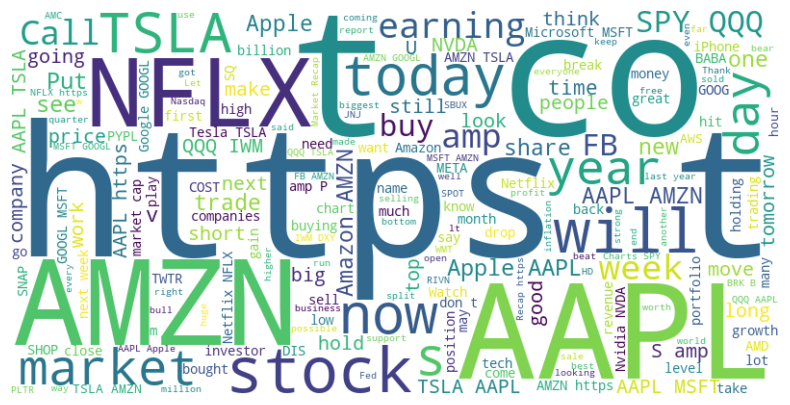

In [257]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all text data into a single string
text_data = ' '.join(filtered_stock_tweets['Tweet'])

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [258]:
import pandas as pd

# Assuming you have a DataFrame named filtered_stock_tweets containing tweet data
# Extract stock names from the tweets
filtered_stock_tweets['Stock Name'] = filtered_stock_tweets['Tweet'].str.extract(r'\b([A-Z]{3,5})\b')

# Count the occurrences of each stock name
stock_name_counts = filtered_stock_tweets['Stock Name'].value_counts()

# Determine the most tweeted stock name
most_tweeted_stock_name = stock_name_counts.idxmax()
tweet_count = stock_name_counts.max()

print("Most tweeted stock:", most_tweeted_stock_name)
print("Number of tweets:", tweet_count)


Most tweeted stock: AAPL
Number of tweets: 1847


In [259]:
# Filter only AAPL, NFLX, and AMZN stocks from filtered_stock_tweets
filtered_tweets_selected_stocks = filtered_stock_tweets[filtered_stock_tweets['Stock Name'].isin(["AAPL", "NFLX", "AMZN"])]

# Display the filtered DataFrame
print(filtered_tweets_selected_stocks.head())


                     Date                                              Tweet  \
62740 2021-09-30 02:12:45                     $NFLX  https://t.co/xPbataRtRh   
61013 2021-09-30 10:19:31  I bought my first $AAPL stock in 2010. \n\nSin...   
61009 2021-09-30 15:37:52  All about this trendline now on $AAPL, continu...   
52436 2021-09-30 19:45:13  Amazon $AMZN has 4X the market cap of Alibaba ...   
62736 2021-09-30 23:07:48  New billboard out on Sunset Blvd. today from $...   

      Stock Name      Company Name  Compound  Positive  Negative  Neutral  \
62740       NFLX     Netflix, Inc.    0.0000     0.000     0.000    1.000   
61013       AAPL        Apple Inc.    0.3182     0.103     0.000    0.897   
61009       AAPL        Apple Inc.   -0.4019     0.000     0.197    0.803   
52436       AMZN  Amazon.com, Inc.   -0.5106     0.032     0.095    0.873   
62736       NFLX     Netflix, Inc.    0.0000     0.000     0.000    1.000   

       Daily_Return       EMA  
62740     -1.000000  0.0

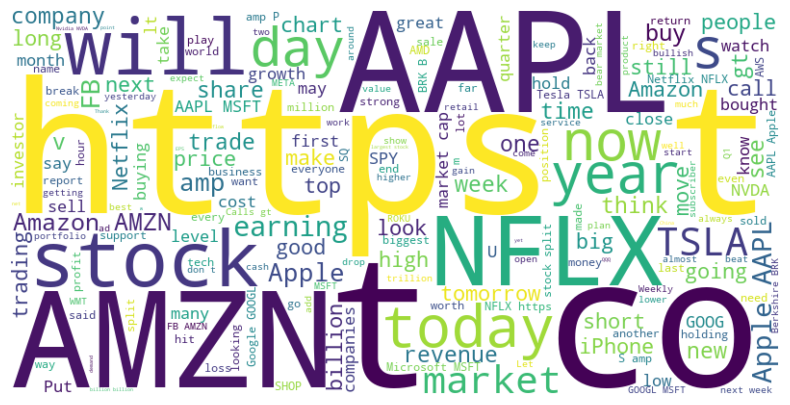

In [260]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter only AAPL, NFLX, and AMZN tweets
filtered_tweets_selected_stocks = filtered_stock_tweets[filtered_stock_tweets['Stock Name'].isin(['AAPL', 'NFLX', 'AMZN'])]

# Concatenate all text data into a single string
text_data = ' '.join(filtered_tweets_selected_stocks['Tweet'])

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [261]:
# 1. Verify Filtered Data
print(filtered_tweets_selected_stocks.head())

# 2. Check Stock Names
print(filtered_tweets_selected_stocks['Stock Name'].unique())

# 3. Print Word Cloud Text Data
print(text_data)


                     Date                                              Tweet  \
62740 2021-09-30 02:12:45                     $NFLX  https://t.co/xPbataRtRh   
61013 2021-09-30 10:19:31  I bought my first $AAPL stock in 2010. \n\nSin...   
61009 2021-09-30 15:37:52  All about this trendline now on $AAPL, continu...   
52436 2021-09-30 19:45:13  Amazon $AMZN has 4X the market cap of Alibaba ...   
62736 2021-09-30 23:07:48  New billboard out on Sunset Blvd. today from $...   

      Stock Name      Company Name  Compound  Positive  Negative  Neutral  \
62740       NFLX     Netflix, Inc.    0.0000     0.000     0.000    1.000   
61013       AAPL        Apple Inc.    0.3182     0.103     0.000    0.897   
61009       AAPL        Apple Inc.   -0.4019     0.000     0.197    0.803   
52436       AMZN  Amazon.com, Inc.   -0.5106     0.032     0.095    0.873   
62736       NFLX     Netflix, Inc.    0.0000     0.000     0.000    1.000   

       Daily_Return       EMA  
62740     -1.000000  0.0

In [262]:
import pandas as pd
import re

# Sample tweets data
tweets_data = {
    'text': [
        "$AMZN $SE $CRWD $APPS $EGLX $MGNI Hope you all started the week off right",
        "Funny that AMZN and GME stand out as outliers, with increasing post-split intraday volatility. Phil thinks this is due to coincidental, related announcements, which I think is probably right for AMZN. I think GME trades differently from nearly every other stock, for many reasons.",
        "$AMZN will spend $15B on streaming content in ‘22 vs $14B at $NFLX.",
        "9/12/22 Options Trading Watchlist $AMZN 128/129/130p &lt; $134.2 $AMD 88/89c &gt; $84.8",
        "During the second quarter, Amazon’s, $AMZN, workforce shrank by roughly 100,000 jobs to 1.52 million, the biggest quarter-to-quarter contraction in the company’s history.",
        "$AMZN Looks just about ready to EXPLODE out of this wedge",
        "Amazon is suffering from its slowest growth rate in 20 years.",
        "9/7/2022 Options Trading Watchlist $AMZN 122/123p &lt; $127.35 $MSFT 245/247.5p &lt; $256.4",
        "9/7/2022 Options Trading Watchlist $AMZN 122/123p &lt; $127.35 $MSFT 245/247.5p &lt; $255.8 $META after hours contingent (see thread)"
    ]
}

# Convert to DataFrame
tweets_df = pd.DataFrame(tweets_data)

# Define the regex pattern to match stock symbols
stock_symbols = ['AAPL', 'NFLX', 'AMZN']
pattern = '|'.join([re.escape('$' + symbol) for symbol in stock_symbols])

# Filter tweets containing any of the specified stock symbols
filtered_tweets = tweets_df[tweets_df['text'].str.contains(pattern)]

# Display filtered tweets
print(filtered_tweets)


                                                text
0  $AMZN $SE $CRWD $APPS $EGLX $MGNI Hope you all...
2  $AMZN will spend $15B on streaming content in ...
3  9/12/22 Options Trading Watchlist $AMZN 128/12...
4  During the second quarter, Amazon’s, $AMZN, wo...
5  $AMZN Looks just about ready to EXPLODE out of...
7  9/7/2022 Options Trading Watchlist $AMZN 122/1...
8  9/7/2022 Options Trading Watchlist $AMZN 122/1...


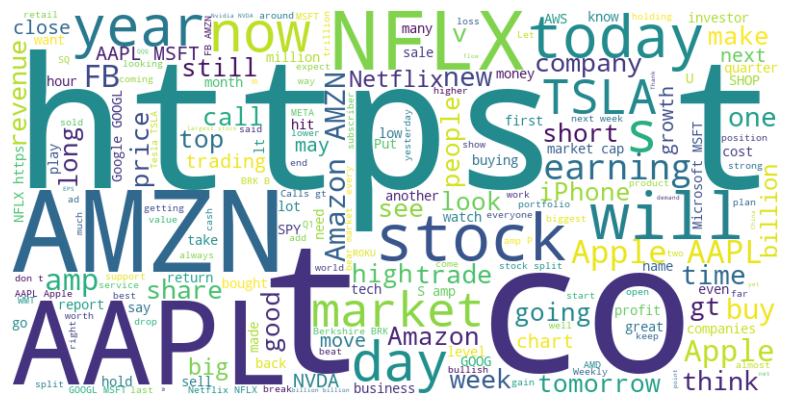

In [263]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets mentioning AMZN, NFLX, and AAPL
selected_stocks = ['AMZN', 'NFLX', 'AAPL']
filtered_tweets_selected_stocks2 = filtered_tweets_selected_stocks[filtered_tweets_selected_stocks['Tweet'].str.contains('|'.join(selected_stocks))]

# Concatenate text data into a single string
text_data_stocks = ' '.join(filtered_tweets_selected_stocks2['Tweet'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_stocks)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [264]:
from collections import Counter

# Count occurrences of each stock symbol
stock_counts = Counter(filtered_tweets_selected_stocks['Stock Name'])

# Sort the counts in descending order
sorted_stocks = stock_counts.most_common()

# Extract the most tweeted stock and the second and third most tweeted stocks
most_tweeted = sorted_stocks[0]
second_most_tweeted = sorted_stocks[1]
third_most_tweeted = sorted_stocks[2]

print("Most tweeted stock:", most_tweeted)
print("Second most tweeted stock:", second_most_tweeted)
print("Third most tweeted stock:", third_most_tweeted)


Most tweeted stock: ('AAPL', 1847)
Second most tweeted stock: ('AMZN', 1333)
Third most tweeted stock: ('NFLX', 670)


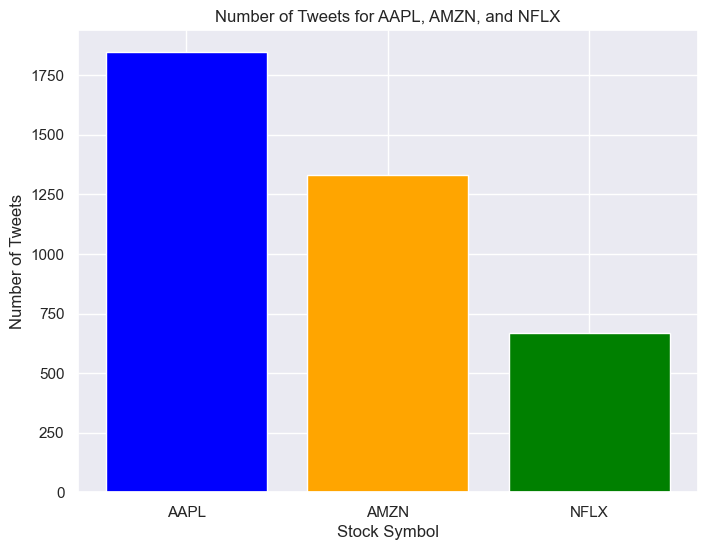

In [265]:
import matplotlib.pyplot as plt

# Assuming stock_counts contains the counts for each stock symbol

# Extract the counts for AAPL, AMZN, and NFLX
aapl_count = stock_counts.get('AAPL', 0)
amzn_count = stock_counts.get('AMZN', 0)
nflx_count = stock_counts.get('NFLX', 0)

# Create labels and counts for the bar chart
labels = ['AAPL', 'AMZN', 'NFLX']
counts = [aapl_count, amzn_count, nflx_count]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Stock Symbol')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for AAPL, AMZN, and NFLX')
plt.show()


# Merging data

In [295]:
print(filtered_stock_data.columns)
print(filtered_stock_tweets.columns)



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name', 'Close_first_diff', 'Close_second_diff', 'Close_log',
       'FirstDiff', 'SecondDiff'],
      dtype='object')
Index(['Tweet', 'Stock Name', 'Company Name', 'Compound', 'Positive',
       'Negative', 'Neutral', 'Daily_Return', 'EMA'],
      dtype='object')


In [296]:
filtered_stock_tweets

Tweet  \
Date                                                                     
2021-09-30 02:12:45                     $NFLX  https://t.co/xPbataRtRh   
2021-09-30 10:19:31  I bought my first $AAPL stock in 2010. \n\nSin...   
2021-09-30 10:22:53  The media is really pushing hard for their big...   
2021-09-30 13:36:10  In 2020, Tim Cook, CEO of $AAPL, earned $265,0...   
2021-09-30 15:37:52  All about this trendline now on $AAPL, continu...   

                    Stock Name   Company Name  Compound  Positive  Negative  \
Date                                                                          
2021-09-30 02:12:45       NFLX  Netflix, Inc.    0.0000     0.000     0.000   
2021-09-30 10:19:31       AAPL     Apple Inc.    0.3182     0.103     0.000   
2021-09-30 10:22:53        NaN     Apple Inc.    0.2296     0.095     0.076   
2021-09-30 13:36:10        CEO     Apple Inc.    0.0000     0.000     0.000   
2021-09-30 15:37:52       AAPL     Apple Inc.   -0.4019     0.000     0.197   

                     Neutral  Daily_Return       EMA  
Date                                                  
2021-09-30 02:12:45    1.000     -1.000000  0.000000  
2021-09-30 10:19:31    0.897     -0.500393  0.176778  
2021-09-30 10:22:53    0.829     -0.278441  0.198426  
2021-09-30 13:36:10    1.000     -1.000000  0.131209  
2021-09-30 15:37:52    0.803     -1.843088 -0.027379

In [297]:
filtered_stock_data

Date        Open        High         Low       Close   Adj Close  \
1010 2021-10-04  163.969498  163.999496  158.812500  159.488998  159.488998   
1011 2021-10-05  160.225006  163.036499  160.123001  161.050003  161.050003   
1012 2021-10-06  160.676498  163.216995  159.931000  163.100494  163.100494   
1013 2021-10-07  164.576996  166.287506  164.153000  165.121506  165.121506   
1014 2021-10-08  165.850006  166.071503  164.410004  164.431000  164.431000   
...         ...         ...         ...         ...         ...         ...   
2263 2022-09-23  235.139999  236.449997  221.429993  226.410004  226.410004   
2264 2022-09-26  225.600006  232.699997  223.009995  224.070007  224.070007   
2265 2022-09-27  228.630005  230.639999  220.720001  224.360001  224.360001   
2266 2022-09-28  229.690002  246.649994  227.380005  245.199997  245.199997   
2267 2022-09-29  241.610001  246.979996  235.679993  239.710007  239.710007   

        Volume Stock Name  Close_first_diff  Close_second_diff  Close_log  \
1010  90462000       AMZN         -4.673996          -4.584992   5.071975   
1011  65384000       AMZN          1.561005           6.235001   5.081715   
1012  50660000       AMZN          2.050491           0.489487   5.094367   
1013  48182000       AMZN          2.021011          -0.029480   5.106682   
1014  39964000       AMZN         -0.690506          -2.711517   5.102491   
...        ...        ...               ...                ...        ...   
2263  11207200       NFLX        -10.639999         -10.820007   5.422348   
2264   8234300       NFLX         -2.339996           8.300003   5.411959   
2265   7762200       NFLX          0.289993           2.629990   5.413252   
2266  17579700       NFLX         20.839996          20.550003   5.502074   
2267  18994900       NFLX         -5.489990         -26.329986   5.479430   

      FirstDiff  SecondDiff  
1010   0.000000    0.000000  
1011   1.561005    1.561005  
1012   2.050491    0.489487  
1013   2.021011   -0.029480  
1014  -0.690506   -2.711517  
...         ...         ...  
2263 -10.639999  -10.820007  
2264  -2.339996    8.300003  
2265   0.289993    2.629990  
2266  20.839996   20.550003  
2267  -5.489990  -26.329986  

[754 rows x 13 columns]

In [312]:
# Convert the date columns to the same format
filtered_stock_data['Date'] = pd.to_datetime(filtered_stock_data['Date']).dt.date
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.date


In [313]:
filtered_stock_tweets['Stock Name'].fillna(value='UNKNOWN', inplace=True)


In [314]:
filtered_stock_tweets.dropna(subset=['Stock Name'], inplace=True)


In [315]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
filtered_stock_tweets['Stock Name'] = imputer.fit_transform(filtered_stock_tweets[['Stock Name']])


In [316]:
# Merge the dataframes on 'Date' and 'Stock Name'
merged_data = pd.merge(filtered_stock_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])

# Check the result of the merge
print(merged_data.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-30  143.660004  144.380005  141.279999  141.500000  140.478485   
1  2021-09-30  143.660004  144.380005  141.279999  141.500000  140.478485   
2  2021-09-30  608.049988  619.000000  608.049988  610.340027  610.340027   

     Volume Stock Name  Close_first_diff  Close_second_diff  ...   FirstDiff  \
0  89056700       AAPL         26.699997          29.909996  ...   26.699997   
1  89056700       AAPL         26.699997          29.909996  ...   26.699997   
2   6612600       NFLX        467.860031         475.220032  ...  467.860031   

   SecondDiff                                              Tweet  \
0   29.909996  I bought my first $AAPL stock in 2010. \n\nSin...   
1   29.909996  All about this trendline now on $AAPL, continu...   
2  475.220032                     $NFLX  https://t.co/xPbataRtRh   

    Company Name Compound  Positive  Negative  Neutral  Daily_Return       EMA  
0     Apple Inc.

In [321]:
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])


In [322]:
merged_data = pd.merge(stock_yfinance_data, filtered_stock_tweets, how='inner', on='Date')


In [324]:
print(merged_data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name_x', 'Tweet', 'Stock Name_y', 'Company Name', 'Compound',
       'Positive', 'Negative', 'Neutral', 'Daily_Return', 'EMA'],
      dtype='object')


In [325]:
merged_data = pd.merge(stock_yfinance_data, filtered_stock_tweets, how='inner', on='Date', suffixes=('_yfinance', '_tweets'))
